# **Regarding The First Principles Application**

In this project (Chronic Kidney Disease Analysis and Prediction Project), we will be applying first principles thinking. This approach deconstructs complex issues into simpler contexts.

These processes include formulating assumptions, validating those assumptions with data, looking for evidence, exploring the relationships between variables, and understanding the core elements of CKD.

By analyzing the data individually, we will identify the key predictors and understand their interactions. From these insights, we will then explore both likelihood-based (non-machine learning) and machine learning approaches to develop effective solutions that can be used to accurately identify the presence of chronic kidney disease.


#**The Objective**
- Be able to identify the cause of chronic kidney disease in an early stage prior it become non-reversable.




#**List Assumpions and Identify the Truth**
- Is the early stage symptoms differ from the late stage symptoms for chronic kidney disease?

- Is sodium and sugar level a good indicator of chronic kidney disease?

- Is urine test more efficient in identify chronic kidney diseases than a blood test?

- Can bgr and dm help tell us anything about the stage of kidney disease?

- How effectively assessing inflammation levels such as: pc, pcc, ba, wbcc andcrp in determining kidney disease?


- Can peda edema and apetite (physical symptoms) help in identify the early sign of chronic kidney disease?

- Is gfr directly link to the level of chronic kidney disease?

- Is chance of getting kidney disease align with the growth of age? Does that mean the higher the age, the higher the chance of developing kidney disease?

- Is having hypertension and cardiovascular disease likely lead to chronic kidney disease?

#**Challenging the Assumptions**

- What specific symptoms are referring to? Are there research studies that have clearly delineated and validated the symptom differences across stages?

- In which extent, sodium and sugar level can be used as an indicator?

- Which metric in both blood and urine can be tell us about kidney disease?

- What is the relationship between bgr, dm, and kidney disease progression? Are there confounding factors that could influence this relationship?

- What is the rationale for using these specific inflammation markers? Are they really effective? Does that backed by evidence research?

- Are these physical symptoms specific to kidney disease, or could they be caused by other conditions? At what stage of kidney disease do these symptoms typically appear?

- How accurately does GFR reflect kidney function and disease progression? Are there other factors that could influence GFR measurements?

- What measure can be used to conclude that age contribute to kidney disease?

- What is the probability patient with chronic kidney disease has above threshold hypertension and cardiovascualr disease?

#**Informations**

**Tests Commonly Done Using Urine:**
- sg - Specific Gravity
- su - Sugar
- pc - Pus Cell
- pcc - Pus Cell Clumps
- ba - Bacteria

**Tests Commonly Done Using Blood:**
- bgr - Blood Glucose Random
- bu - Blood Urea
- sod - Sodium
- sc - Serum Creatinine
- pot - Potassium
- hemo - Hemoglobin
- pcv - Packed Cell Volume
- rbcc - Red Blood Cell Count
- wbcc - White Blood Cell Count
- cad - Coronary Artery Disease
- grf - Glomerular Filtration Rate
- rbc - Red Blood Cell
- ane- Anemia
- al- Albumin

**Neither Blood Test Or Urine Test:**
- bp - Measured via blood pressure cuff
- htn - Hypertension (Clinical diagnosis)
- dm - Diabetes Mellitus (Clinical diagnosis, related to blood glucose levels)
- cad - Coronary Artery Disease (Clinical diagnosis, related to heart health)
- appet - Appetite (Symptom)
- pe - Peda Edema (Clinical observation)


#**The Metrics**

(a) Accuracy: Evaluate the proportion of correctly classified instances out of total instances.

(b) Precision: Evaluate the proportion of true positive instance out of the instances classified as positive.

(c) Recall (True Positive Rate): Evaluate the proportion of the true positive instance out of actual positive instance.

(d) F1: The harmonic mean of precision and recall.

(e) ROC AUC: Measures the ability of the model to distinguish between classes, considering all classification thresholds.

(f) Log Loss (Cross- EntropY Loss): Measures the performance of a classification model where the prediction is a probability value between 0 and 1.

For imbalanced classes, precision, recall and f1 score would provide more information.

- Recall focused on minimising False Negative (FN) and is crucial when missing positive instance is costly. Formula as: TP/(TP+FN)

- Precision is used when cost of false positive is high.

- F1 combined both precision and recall to provide a balanced measure.


With our task to correctly identified correct chronic kidney disease (CKD), where false negative can be costly, therefore, recall will be the key metric we will be using to evaluate the model.

While evaluating the model, f1, roc, and log-loss metrics can also be used as sub-metrices to further evaluate the model.

#**Installing Libraries**

In [1]:
!pip install pyforest -q
!pip install dataprep -q
!pip install plotly -q

!pip install -U ppscore -q

#**Importing Libraries**

In [2]:
import pyforest
from dataprep.eda import create_report
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ppscore as pps
#from causalml.inference.tree import UpliftRandomForestClassifier
#from econml.dml import DoubleML


import warnings
warnings.filterwarnings("ignore")


#**Reading the File**

In [3]:
df= pd.read_csv("ckd-dataset-v2.csv")
df

<IPython.core.display.Javascript object>

bp (Diastolic)  bp limit             sg        al     class       rbc  \
0         discrete  discrete       discrete  discrete  discrete  discrete   
1              NaN       NaN            NaN       NaN       NaN       NaN   
2                0         0  1.019 - 1.021     1 - 1       ckd         0   
3                0         0  1.009 - 1.011       < 0       ckd         0   
4                0         0  1.009 - 1.011       ≥ 4       ckd         1   
..             ...       ...            ...       ...       ...       ...   
197              1         2  1.019 - 1.021       < 0       ckd         0   
198              0         0  1.019 - 1.021       < 0       ckd         0   
199              1         1        ≥ 1.023       < 0    notckd         0   
200              1         1        ≥ 1.023       < 0    notckd         0   
201              1         1  1.009 - 1.011     2 - 2       ckd         0   

           su        pc       pcc        ba  ...       htn        dm  \
0    discrete  discrete  discrete  discrete  ...  discrete  discrete   
1         NaN       NaN       NaN       NaN  ...       NaN       NaN   
2         < 0         0         0         0  ...         0         0   
3         < 0         0         0         0  ...         0         0   
4         < 0         1         0         1  ...         0         0   
..        ...       ...       ...       ...  ...       ...       ...   
197       < 0         0         0         0  ...         1         1   
198       < 0         0         0         0  ...         0         1   
199       < 0         0         0         0  ...         0         0   
200       < 0         0         0         0  ...         0         0   
201     2 - 2         0         0         0  ...         1         1   

          cad     appet        pe       ane                grf     stage  \
0    discrete  discrete  discrete  discrete           discrete  discrete   
1         NaN       NaN       NaN       NaN                NaN       NaN   
2           0         0         0         0          ≥ 227.944        s1   
3           0         0         0         0          ≥ 227.944        s1   
4           0         1         0         0  127.281 - 152.446        s1   
..        ...       ...       ...       ...                ...       ...   
197         0         0         0         1  26.6175 - 51.7832        s3   
198         0         0         0         1          < 26.6175        s4   
199         0         0         0         0   51.7832 - 76.949        s2   
200         0         0         0         0  102.115 - 127.281        s1   
201         0         0         0         0          < 26.6175        s4   

     affected       age  
0    discrete  discrete  
1       class      meta  
2           1      < 12  
3           1      < 12  
4           1      < 12  
..        ...       ...  
197         1      ≥ 74  
198         1      ≥ 74  
199         0      ≥ 74  
200         0      ≥ 74  
201         1      ≥ 74  

[202 rows x 29 columns]

#**Dataset Variable Description**

bp- Blood Pressure (mm/Hg)

sg- Specificity Gravity

al- Albumin

rbc- Red Blood Cell

su- Sugar

pc- Pus Cell

pcc- Pus Cell Clumps

ba- Bacteria

bgr- Blood Glucose Random

bu- Blood urea

sod- Sodium

sc- Serum Creatinine

pot- Potassium

hemo- Hemoglobin

cv- Packed Cell Volume

rbcc- Red Blood Cell Count

wbcc- White Blood Cell Count

htn- Hypertension

dm- Diabetes Mellitus

cad- Coronary Artery Disease

appet- Appetite

pe- Peda Edema

ane- Anemia

grf- Glomerular Filtration Rate

stage- Stage

affected- Affected

age- Age

class- Class


References from Article: Chronic Kidney Disease Prediction Based on Machine Learning Algorithms

URL: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9874070/





#**Data Wrangling**


**Dropping Irrelevant Rows- For Data Cleanliness**

In [4]:
# Drop the first row via direct index slicing
df1= df.drop(df.index[[0,1]])
df1.head(5)

bp (Diastolic) bp limit             sg     al class rbc   su pc pcc ba  ...  \
2              0        0  1.019 - 1.021  1 - 1   ckd   0  < 0  0   0  0  ...   
3              0        0  1.009 - 1.011    < 0   ckd   0  < 0  0   0  0  ...   
4              0        0  1.009 - 1.011    ≥ 4   ckd   1  < 0  1   0  1  ...   
5              1        1  1.009 - 1.011  3 - 3   ckd   0  < 0  0   0  0  ...   
6              0        0  1.015 - 1.017    < 0   ckd   0  < 0  0   0  0  ...   

  htn dm cad appet pe ane                grf stage affected      age  
2   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
3   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
4   0  0   0     1  0   0  127.281 - 152.446    s1        1     < 12  
5   0  0   0     0  0   0  127.281 - 152.446    s1        1     < 12  
6   0  1   0     1  1   0  127.281 - 152.446    s1        1  12 - 20  

[5 rows x 29 columns]

**Implementing Exploratory Data Analysis (EDA) to understand the data distribution.**

DataPrep Report
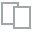
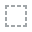
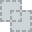
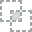
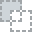
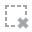
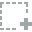
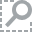
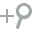
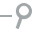
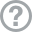
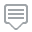
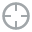
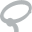
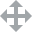
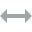
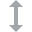
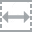
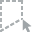
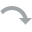
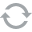
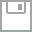
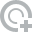
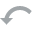
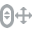
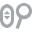
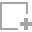
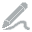
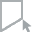
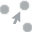
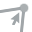
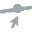

In [5]:
# Implement EDA
ckd_report= create_report(df1)
ckd_report

**Check for duplication**

In [6]:
# Check if the dataset contain of duplicated data
duplicates= df1[df1.duplicated()]
duplicates

# We know that the data itself are all unique records and does not have duplicated data

Empty DataFrame
Columns: [bp (Diastolic), bp limit, sg, al, class, rbc, su, pc, pcc, ba, bgr, bu, sod, sc, pot, hemo, pcv, rbcc, wbcc, htn, dm, cad, appet, pe, ane, grf, stage, affected, age]
Index: []

[0 rows x 29 columns]

**Checking Unique Value- For Data Inspection**

In [7]:
# Check the unique values using a dictionary
unique_values_dict= {column: df1[column].unique() for column in df1.columns}

# Now, access the dictionary
for column, values in unique_values_dict.items():
  print(f"Unique values in {column}: {values}")

Unique values in bp (Diastolic): ['0' '1']
Unique values in bp limit: ['0' '1' '2']
Unique values in sg: ['1.019 - 1.021' '1.009 - 1.011' '1.015 - 1.017' '≥ 1.023' '< 1.007']
Unique values in al: ['1 - 1' '< 0' '≥ 4' '3 - 3' '2 - 2']
Unique values in class: ['ckd' 'notckd']
Unique values in rbc: ['0' '1']
Unique values in su: ['< 0' '4 - 4' '2 - 2' '3 - 4' '1 - 2' '≥ 4']
Unique values in pc: ['0' '1']
Unique values in pcc: ['0' '1']
Unique values in ba: ['0' '1']
Unique values in bgr: ['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364']
Unique values in bu: ['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7']
Unique values in sod: ['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 - 123' '≥ 158']
Unique values in sc: ['< 3.65' '3.65 - 6.8' '16.25 - 19.4' '6.8 - 9.95' '13.1 - 16.25'
 '9.95 - 13.1' '≥ 28.85']
Unique values in pot:

**Transforming The Data- Transform the Data into Right Format**

In [8]:
# Before we start transformed the data, we made a copy of new data
df2= df1.copy()

**Checking the " p " in grf columns**

In [9]:
p_record= df2[df2["grf"].str.contains(" p ")]
p_record

bp (Diastolic) bp limit             sg   al class rbc   su pc pcc ba  ...  \
181              1        2  1.019 - 1.021  < 0   ckd   0  < 0  0   0  0  ...   

    htn dm cad appet pe ane  grf stage affected      age  
181   0  1   0     0  0   0   p     s5        1  66 - 74  

[1 rows x 29 columns]

**Drop the p-record**

In [10]:
df2.drop(df2[df2['grf'].str.contains(" p ")].index, inplace=True)
df2.head(5)

bp (Diastolic) bp limit             sg     al class rbc   su pc pcc ba  ...  \
2              0        0  1.019 - 1.021  1 - 1   ckd   0  < 0  0   0  0  ...   
3              0        0  1.009 - 1.011    < 0   ckd   0  < 0  0   0  0  ...   
4              0        0  1.009 - 1.011    ≥ 4   ckd   1  < 0  1   0  1  ...   
5              1        1  1.009 - 1.011  3 - 3   ckd   0  < 0  0   0  0  ...   
6              0        0  1.015 - 1.017    < 0   ckd   0  < 0  0   0  0  ...   

  htn dm cad appet pe ane                grf stage affected      age  
2   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
3   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
4   0  0   0     1  0   0  127.281 - 152.446    s1        1     < 12  
5   0  0   0     0  0   0  127.281 - 152.446    s1        1     < 12  
6   0  1   0     1  1   0  127.281 - 152.446    s1        1  12 - 20  

[5 rows x 29 columns]

**Prior transforming the whole dataset, we will prioritise transforming categorical data.**

**Processing Class Data**

In [11]:
# Transforming class data with binary
df2["class"]= df2["class"].replace({"ckd": 1, "notckd":0})
df2.head(5)

bp (Diastolic) bp limit             sg     al  class rbc   su pc pcc ba  \
2              0        0  1.019 - 1.021  1 - 1      1   0  < 0  0   0  0   
3              0        0  1.009 - 1.011    < 0      1   0  < 0  0   0  0   
4              0        0  1.009 - 1.011    ≥ 4      1   1  < 0  1   0  1   
5              1        1  1.009 - 1.011  3 - 3      1   0  < 0  0   0  0   
6              0        0  1.015 - 1.017    < 0      1   0  < 0  0   0  0   

   ... htn dm cad appet pe ane                grf stage affected      age  
2  ...   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
3  ...   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
4  ...   0  0   0     1  0   0  127.281 - 152.446    s1        1     < 12  
5  ...   0  0   0     0  0   0  127.281 - 152.446    s1        1     < 12  
6  ...   0  1   0     1  1   0  127.281 - 152.446    s1        1  12 - 20  

[5 rows x 29 columns]

In [12]:
# Creating a dataframe for class
class_description= {
    "Class_Data": [1, 0],
    "Description": ["Chronic Kidney Disease",
                    "Not Chronic kidney Disease"]
}

class_description= pd.DataFrame(class_description)
pd.set_option('display.max_colwidth', None)
class_description

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Class_Data                 Description
0           1      Chronic Kidney Disease
1           0  Not Chronic kidney Disease

**Processing Stage Data**

In [13]:
# Transforming stage data
df2["stage"]= df2["stage"].replace({"s1": 1,
                                    "s2": 2,
                                    "s3": 3,
                                    "s4": 4,
                                    "s5": 5})
df2.head(5)

bp (Diastolic) bp limit             sg     al  class rbc   su pc pcc ba  \
2              0        0  1.019 - 1.021  1 - 1      1   0  < 0  0   0  0   
3              0        0  1.009 - 1.011    < 0      1   0  < 0  0   0  0   
4              0        0  1.009 - 1.011    ≥ 4      1   1  < 0  1   0  1   
5              1        1  1.009 - 1.011  3 - 3      1   0  < 0  0   0  0   
6              0        0  1.015 - 1.017    < 0      1   0  < 0  0   0  0   

   ... htn dm cad appet pe ane                grf stage affected      age  
2  ...   0  0   0     0  0   0          ≥ 227.944     1        1     < 12  
3  ...   0  0   0     0  0   0          ≥ 227.944     1        1     < 12  
4  ...   0  0   0     1  0   0  127.281 - 152.446     1        1     < 12  
5  ...   0  0   0     0  0   0  127.281 - 152.446     1        1     < 12  
6  ...   0  1   0     1  1   0  127.281 - 152.446     1        1  12 - 20  

[5 rows x 29 columns]

In [14]:
# Creating a dataframe for stage
stage_description= {
    "Stage_Data": [1, 2, 3, 4, 5],
    "Description": ["Stage One",
                    "Stage Two",
                    "Stage Three",
                    "Stage Four",
                    "Stage Five"]
}

stage_description= pd.DataFrame(stage_description)
stage_description

<IPython.core.display.Javascript object>

Stage_Data  Description
0           1    Stage One
1           2    Stage Two
2           3  Stage Three
3           4   Stage Four
4           5   Stage Five

**Transforming  the data in range.**

**We explored different techniques included:**

(a) .apply() function: Use it both series and dataframe, it applies a function to each elements- row and column. It is versatile in return a single values.

(b) .map() function: Use it only series. It apply mapping relationship to each element in the series, primarily used to transform value in a series with another value.

(c) .applymap() function: Only used in dataframe. It is used for element-wise operations across the whole dataframe. It is useful when you want to apply the transformation that affects each element in the same way without aggregating/ reducing data.


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 2 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  199 non-null    object
 1   bp limit        199 non-null    object
 2   sg              199 non-null    object
 3   al              199 non-null    object
 4   class           199 non-null    int64 
 5   rbc             199 non-null    object
 6   su              199 non-null    object
 7   pc              199 non-null    object
 8   pcc             199 non-null    object
 9   ba              199 non-null    object
 10  bgr             199 non-null    object
 11  bu              199 non-null    object
 12  sod             199 non-null    object
 13  sc              199 non-null    object
 14  pot             199 non-null    object
 15  hemo            199 non-null    object
 16  pcv             199 non-null    object
 17  rbcc            199 non-null    object
 18  wbcc      

In [16]:
df2.head(5)

bp (Diastolic) bp limit             sg     al  class rbc   su pc pcc ba  \
2              0        0  1.019 - 1.021  1 - 1      1   0  < 0  0   0  0   
3              0        0  1.009 - 1.011    < 0      1   0  < 0  0   0  0   
4              0        0  1.009 - 1.011    ≥ 4      1   1  < 0  1   0  1   
5              1        1  1.009 - 1.011  3 - 3      1   0  < 0  0   0  0   
6              0        0  1.015 - 1.017    < 0      1   0  < 0  0   0  0   

   ... htn dm cad appet pe ane                grf stage affected      age  
2  ...   0  0   0     0  0   0          ≥ 227.944     1        1     < 12  
3  ...   0  0   0     0  0   0          ≥ 227.944     1        1     < 12  
4  ...   0  0   0     1  0   0  127.281 - 152.446     1        1     < 12  
5  ...   0  0   0     0  0   0  127.281 - 152.446     1        1     < 12  
6  ...   0  1   0     1  1   0  127.281 - 152.446     1        1  12 - 20  

[5 rows x 29 columns]

In [17]:
# We handle the range columns data by obtaining the middle value if the data is within a range, with 0.001 extra if the data involve ≥, and 0.001 lesser if the data involve <
def parse_value(val):

  # Ensure the value is treat as string
  val= str(val)

  if "-" in val:
    min_val, max_val= map(float, val.split("-"))
    return (min_val + max_val)/2

  elif "≥" in val:
    return float(val.strip("≥"))+ 0.001

  elif "<" in val:
    return float (val.strip ("<"))- 0.001

  else:
      return float(val)

# Applying the function to specific columns
columns_to_process= ["sg",
                     "al",
                     "su",
                     "bgr",
                     "bu",
                     "sod",
                     "sc",
                     "pot",
                     "hemo",
                     "pcv",
                     "rbcc",
                     "wbcc",
                     "grf",
                     "age"]

# Applying the function to columns_to_process
df2[columns_to_process]= df2[columns_to_process].applymap(parse_value)
df2.head(5)

bp (Diastolic) bp limit     sg     al  class rbc     su pc pcc ba  ...  htn  \
2              0        0  1.020  1.000      1   0 -0.001  0   0  0  ...    0   
3              0        0  1.010 -0.001      1   0 -0.001  0   0  0  ...    0   
4              0        0  1.010  4.001      1   1 -0.001  1   0  1  ...    0   
5              1        1  1.010  3.000      1   0 -0.001  0   0  0  ...    0   
6              0        0  1.016 -0.001      1   0 -0.001  0   0  0  ...    0   

   dm  cad  appet  pe  ane       grf  stage  affected     age  
2   0    0      0   0    0  227.9450      1         1  11.999  
3   0    0      0   0    0  227.9450      1         1  11.999  
4   0    0      1   0    0  139.8635      1         1  11.999  
5   0    0      0   0    0  139.8635      1         1  11.999  
6   1    0      1   1    0  139.8635      1         1  16.000  

[5 rows x 29 columns]

#**Converting the Data Type**

In [18]:
# Converting all columns into float
df2= df2.astype(float)

# Round the data
df2 = df2.round(5)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 2 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  199 non-null    float64
 1   bp limit        199 non-null    float64
 2   sg              199 non-null    float64
 3   al              199 non-null    float64
 4   class           199 non-null    float64
 5   rbc             199 non-null    float64
 6   su              199 non-null    float64
 7   pc              199 non-null    float64
 8   pcc             199 non-null    float64
 9   ba              199 non-null    float64
 10  bgr             199 non-null    float64
 11  bu              199 non-null    float64
 12  sod             199 non-null    float64
 13  sc              199 non-null    float64
 14  pot             199 non-null    float64
 15  hemo            199 non-null    float64
 16  pcv             199 non-null    float64
 17  rbcc            199 non-null    flo

#**Inspecting the Data Distribution**





**Examine the Central Tendency, Dispersion, and Shape of Distribution**

In [19]:
# Applying .describe()
display(df2.describe().style.background_gradient(cmap='viridis'))

In [20]:
df3= df2.copy()

In [21]:
# Using plotly to generating interactive charts
def add_histogram(data, title, color, show_legend):
    return go.Histogram(x= data, marker_color= color, name= title, showlegend= show_legend)

def preprocess_data(df):
    # Convert all column values to string for consistent categorization
    for col in df.columns:
        df[col]= df[col].astype(str)
    return df

def plot_comparative_histograms(df1, df3):
    df1= preprocess_data(df1)
    df3= preprocess_data(df3)

    columns= df1.columns
    num_rows= len(columns)
    cols_per_row= 2

    if num_rows== 0:
        print("No valid columns to plot.")
        return

    # Create the subplot figure with specified rows and columns
    fig = make_subplots(
        rows= num_rows,
        cols=cols_per_row,
        subplot_titles=[f"{col}" for col in columns for _ in range(2)]
    )

    # Ensure legend only shows once for each color
    show_legend_before= True
    show_legend_after= True

    # Add histograms to the figure
    for i, col in enumerate(columns):
        fig.add_trace(add_histogram(df1[col], "Before Transformation", "Blue", show_legend_before), row= i+1, col= 1)
        fig.add_trace(add_histogram(df3[col], "After Transformation", "Red", show_legend_after), row= i+1, col= 2)

        # Disable legend for subsequent traces
        show_legend_before= False
        show_legend_after= False

    # Adjust the layout
    fig.update_layout(
        title= "Interactive Histograms Comparison by Column",
        bargap= 0.2,
        showlegend= True,
        legend= dict(
            orientation= "h",
            x= 0.5,  # Center horizontally
            y= 1.02,  # Position slightly above the top
            xanchor= "center",
            yanchor= "bottom",
            traceorder= "normal"
        ),
        height= 200 * num_rows + 40,  # Adjusted height calculation to tightly fit rows
        width= 1000,
        margin= dict(t= 40, l= 40, b= 40, r= 40)  # Minimal top margin to reduce space
    )

    # Show the figure
    fig.show()

# Plot the data
plot_comparative_histograms(df1, df3)

#**Explore the Negative Sample**

In [22]:
# Extract the data using query
negative_sample= df2.query("`class` == 0")

In [23]:
# Examine the central tendency
neg_des= negative_sample.describe()

# Compute the coefficient of variantion for each features
neg_coeffient_var= neg_des.loc["std"]/ neg_des.loc["mean"]

# Set 10% as the threshold
cov_threshold= 0.10
significant_features= neg_coeffient_var > cov_threshold

# Filter the significant features
significant_feature_neg= neg_des.loc[:, significant_features]

print("Summary statistics for significant features based on CV threshold:")
print(significant_feature_neg)

Summary statistics for significant features based on CV threshold:
       bp (Diastolic)   bp limit         bu      rbcc          wbcc  \
count       72.000000  72.000000  72.000000  72.00000     72.000000   
mean         0.472222   0.458333  50.480375   5.41875   7855.833278   
std          0.502731   0.501757   6.344741   0.62579   1783.602830   
min          0.000000   0.000000  48.099000   4.16500   4979.999000   
25%          0.000000   0.000000  48.099000   4.75500   6170.000000   
50%          0.000000   0.000000  48.099000   5.34500   8550.000000   
75%          1.000000   1.000000  48.099000   5.93500   8550.000000   
max          1.000000   1.000000  67.150000   6.52500  10930.000000   

              grf      stage        age  
count   72.000000  72.000000  72.000000  
mean   115.047226   1.486111  48.020875  
std     49.481363   0.768995  15.537494  
min     26.616500   1.000000  16.000000  
25%     64.366100   1.000000  31.000000  
50%    114.698000   1.000000  47.000000  

In [24]:
print("\nCoefficient of Variation for significant features:")
print(neg_coeffient_var[significant_features])


Coefficient of Variation for significant features:
bp (Diastolic)    1.064607
bp limit          1.094744
bu                0.125687
rbcc              0.115486
wbcc              0.227042
grf               0.430096
stage             0.517455
age               0.323557
dtype: float64


In [25]:
# Pre-process negative_sample
# Extract significant features from negative_Sample
significant_negative_f= negative_sample[["al", "bu", "rbcc", "wbcc", "grf", "stage", "age"]]
significant_negative_f

bu   rbcc       wbcc        grf  stage     age
7    48.099  5.345   6170.000  114.69800    1.0  16.000
10   67.150  5.345   4979.999   39.20035    4.0  23.500
12   48.099  6.525   8550.000   89.53200    2.0  23.500
13   48.099  5.345   6170.000  165.02900    1.0  23.500
14   48.099  6.525  10930.000   89.53200    1.0  23.500
..      ...    ...        ...        ...    ...     ...
189  48.099  4.755  10930.000  165.02900    1.0  70.000
190  67.150  4.755   6170.000  139.86350    1.0  70.000
193  67.150  5.935   8550.000  114.69800    1.0  74.001
199  48.099  6.525   8550.000   64.36610    2.0  74.001
200  48.099  4.755   6170.000  114.69800    1.0  74.001

[72 rows x 6 columns]

In [26]:
# Discovering any features that can detect early non-chronic kidney disease
categorical_vars = significant_negative_f.columns

# Exploring chi2 to identify dependency
from scipy.stats import chi2_contingency

# Loop through each pair of categorical variables
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(significant_negative_f[var1], significant_negative_f[var2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            if p <= 0.05:
                print(f"\nAssociation between {var1} and {var2}")
                print(f"Chi-Square Statistic: {chi2}, P-value: {p}")
                print(f"Significant association between {var1} and {var2} (reject null hypothesis).")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Association between bu and grf
Chi-Square Statistic: 30.771323914181053, P-value: 0.00015429560894309605
Significant association between bu and grf (reject null hypothesis).


<IPython.core.display.Javascript object>


Association between bu and stage
Chi-Square Statistic: 29.704347826086956, P-value: 3.546360044589383e-07
Significant association between bu and stage (reject null hypothesis).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Association between rbcc and grf
Chi-Square Statistic: 53.569609253958006, P-value: 0.00980241630439357
Significant association between rbcc and grf (reject null hypothesis).


<IPython.core.display.Javascript object>


Association between rbcc and stage
Chi-Square Statistic: 19.144633215605086, P-value: 0.014104994205650739
Significant association between rbcc and stage (reject null hypothesis).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Association between grf and bu
Chi-Square Statistic: 30.771323914181057, P-value: 0.00015429560894309575
Significant association between grf and bu (reject null hypothesis).


<IPython.core.display.Javascript object>


Association between grf and rbcc
Chi-Square Statistic: 53.56960925395799, P-value: 0.009802416304393642
Significant association between grf and rbcc (reject null hypothesis).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Association between grf and stage
Chi-Square Statistic: 128.7170568561873, P-value: 1.1386165196769907e-19
Significant association between grf and stage (reject null hypothesis).


<IPython.core.display.Javascript object>


Association between grf and age
Chi-Square Statistic: 97.13657057228485, P-value: 0.004754241658337632
Significant association between grf and age (reject null hypothesis).


<IPython.core.display.Javascript object>


Association between stage and bu
Chi-Square Statistic: 29.704347826086956, P-value: 3.546360044589383e-07
Significant association between stage and bu (reject null hypothesis).


<IPython.core.display.Javascript object>


Association between stage and rbcc
Chi-Square Statistic: 19.144633215605086, P-value: 0.014104994205650739
Significant association between stage and rbcc (reject null hypothesis).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Association between stage and grf
Chi-Square Statistic: 128.7170568561873, P-value: 1.1386165196769907e-19
Significant association between stage and grf (reject null hypothesis).


<IPython.core.display.Javascript object>


Association between stage and age
Chi-Square Statistic: 27.469869840304625, P-value: 0.03654688651226442
Significant association between stage and age (reject null hypothesis).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Association between age and grf
Chi-Square Statistic: 97.13657057228485, P-value: 0.004754241658337632
Significant association between age and grf (reject null hypothesis).


<IPython.core.display.Javascript object>


Association between age and stage
Chi-Square Statistic: 27.469869840304625, P-value: 0.03654688651226442
Significant association between age and stage (reject null hypothesis).


#**Examine Positive Sample- Validate the Assumptions**

In [27]:
# Extract data using query
positive_sample= df2.query("`class` == 1")
positive_sample

bp (Diastolic)  bp limit     sg     al  class  rbc     su   pc  pcc   ba  \
2               0.0       0.0  1.020  1.000    1.0  0.0 -0.001  0.0  0.0  0.0   
3               0.0       0.0  1.010 -0.001    1.0  0.0 -0.001  0.0  0.0  0.0   
4               0.0       0.0  1.010  4.001    1.0  1.0 -0.001  1.0  0.0  1.0   
5               1.0       1.0  1.010  3.000    1.0  0.0 -0.001  0.0  0.0  0.0   
6               0.0       0.0  1.016 -0.001    1.0  0.0 -0.001  0.0  0.0  0.0   
..              ...       ...    ...    ...    ...  ...    ...  ...  ...  ...   
195             0.0       0.0  1.016  1.000    1.0  0.0 -0.001  0.0  0.0  0.0   
196             0.0       0.0  1.016  2.000    1.0  0.0 -0.001  1.0  1.0  0.0   
197             1.0       2.0  1.020 -0.001    1.0  0.0 -0.001  0.0  0.0  0.0   
198             0.0       0.0  1.020 -0.001    1.0  0.0 -0.001  0.0  0.0  0.0   
201             1.0       1.0  1.010  2.000    1.0  0.0  2.000  0.0  0.0  0.0   

     ...  htn   dm  cad  appet   pe  ane        grf  stage  affected     age  
2    ...  0.0  0.0  0.0    0.0  0.0  0.0  227.94500    1.0       1.0  11.999  
3    ...  0.0  0.0  0.0    0.0  0.0  0.0  227.94500    1.0       1.0  11.999  
4    ...  0.0  0.0  0.0    1.0  0.0  0.0  139.86350    1.0       1.0  11.999  
5    ...  0.0  0.0  0.0    0.0  0.0  0.0  139.86350    1.0       1.0  11.999  
6    ...  0.0  1.0  0.0    1.0  1.0  0.0  139.86350    1.0       1.0  16.000  
..   ...  ...  ...  ...    ...  ...  ...        ...    ...       ...     ...  
195  ...  1.0  0.0  0.0    0.0  0.0  0.0   39.20035    3.0       1.0  74.001  
196  ...  1.0  0.0  0.0    1.0  1.0  1.0   26.61650    5.0       1.0  74.001  
197  ...  1.0  1.0  0.0    0.0  0.0  1.0   39.20035    3.0       1.0  74.001  
198  ...  0.0  1.0  0.0    0.0  0.0  1.0   26.61650    4.0       1.0  74.001  
201  ...  1.0  1.0  0.0    0.0  0.0  0.0   26.61650    4.0       1.0  74.001  

[127 rows x 29 columns]

#**List Assumpions and Identify the Truth**

- Is the early stage symptoms differ from the late stage symptoms for chronic kidney disease?

- Is sodium and sugar level a good indicator of chronic kidney disease?

- Is urine test more efficient in identify chronic kidney diseases than a blood test?

- Can bgr and dm help tell us anything about the stage of kidney disease?

- How effectively assessing inflammation levels such as: pc, pcc, ba, wbcc andcrp in determining kidney disease?


- Can peda edema and apetite (physical symptoms) help in identify the early sign of chronic kidney disease?

- Is gfr directly link to the level of chronic kidney disease?

- Is chance of getting kidney disease align with the growth of age? Does that mean the higher the age, the higher the chance of developing kidney disease?

**Tests Commonly Done Using Urine:**

sg - Specific Gravity
    
al - Albumin
    
su - Sugar
    
pc - Pus Cell
    
pcc - Pus Cell Clumps
    
ba - Bacteria

**Tests Commonly Done Using Blood:**

bgr - Blood Glucose Random
    
bu - Blood Urea
    
sod - Sodium
    
sc - Serum Creatinine
    
pot - Potassium
    
hemo - Hemoglobin
    
pcv - Packed Cell Volume
    
rbcc - Red Blood Cell Count
    
wbcc - White Blood Cell Count
    
grf - Glomerular Filtration Rate
    
rbc - Red Blood Cell
    
ane- Anemia

**Neither Blood Test Or Urine Test:**

bp - Measured via blood pressure cuff
    
htn - Hypertension (Clinical diagnosis)

dm - Diabetes Mellitus (Clinical diagnosis, related to blood glucose levels)
    
cad - Coronary Artery Disease (Clinical diagnosis, related to heart health)
    
appet - Appetite (Symptom)
    
pe - Peda Edema (Clinical observation)

#**Assumption 1: Is the early stage symptoms differ from the late stage symptoms for chronic kidney disease?**

In [28]:
# Define a function for stage category
def classify_stage(stage):
    if stage in [1, 2]:
        return "early"
    elif stage == 3:
        return "mid"
    elif stage == 4:
        return "late"
    else:
        return "critical"

# Apply the function into data (chronic kidney disease)
early_late_exploration= positive_sample.copy()
early_late_exploration["stage_category"]= early_late_exploration["stage"].apply(classify_stage)

# Obtain median value and transpose it for easy to read
stagecategory_data= early_late_exploration.groupby('stage_category').median()
transpose_stagecategory= stagecategory_data.transpose()

# Rearrange the column's order
transpose_stagecategory= transpose_stagecategory[["early", "mid", "late", "critical"]]
transpose_stagecategory

stage_category     early         mid       late   critical
bp (Diastolic)     0.000     0.00000     1.0000     1.0000
bp limit           0.000     0.00000     1.0000     1.0000
sg                 1.010     1.01600     1.0160     1.0160
al                -0.001     1.00000     2.0000     2.0000
class              1.000     1.00000     1.0000     1.0000
rbc                0.000     0.00000     0.0000     0.0000
su                -0.001    -0.00100    -0.0010    -0.0010
pc                 0.000     0.00000     0.0000     1.0000
pcc                0.000     0.00000     0.0000     0.0000
ba                 0.000     0.00000     0.0000     0.0000
bgr              133.000   133.00000   133.0000   133.0000
bu                48.099    48.09900    67.1500   143.3500
sod              135.500   135.50000   135.5000   135.5000
sc                 3.649     3.64900     3.6490     8.3750
pot                7.309     7.30900     7.3090     7.3090
hemo              11.950    10.65000    10.6500     9.3500
pcv               39.350    35.45000    35.4500    27.6500
rbcc               4.755     4.75500     4.7550     4.1650
wbcc            8550.000  8550.00000  8550.0000  8550.0000
htn                0.000     1.00000     1.0000     1.0000
dm                 0.000     1.00000     1.0000     1.0000
cad                0.000     0.00000     0.0000     0.0000
appet              0.000     0.00000     0.0000     0.0000
pe                 0.000     0.00000     0.0000     0.5000
ane                0.000     0.00000     0.0000     1.0000
grf               89.532    39.20035    26.6165    26.6165
stage              2.000     3.00000     4.0000     5.0000
affected           1.000     1.00000     1.0000     1.0000
age               47.000    62.50000    62.5000    58.7500

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

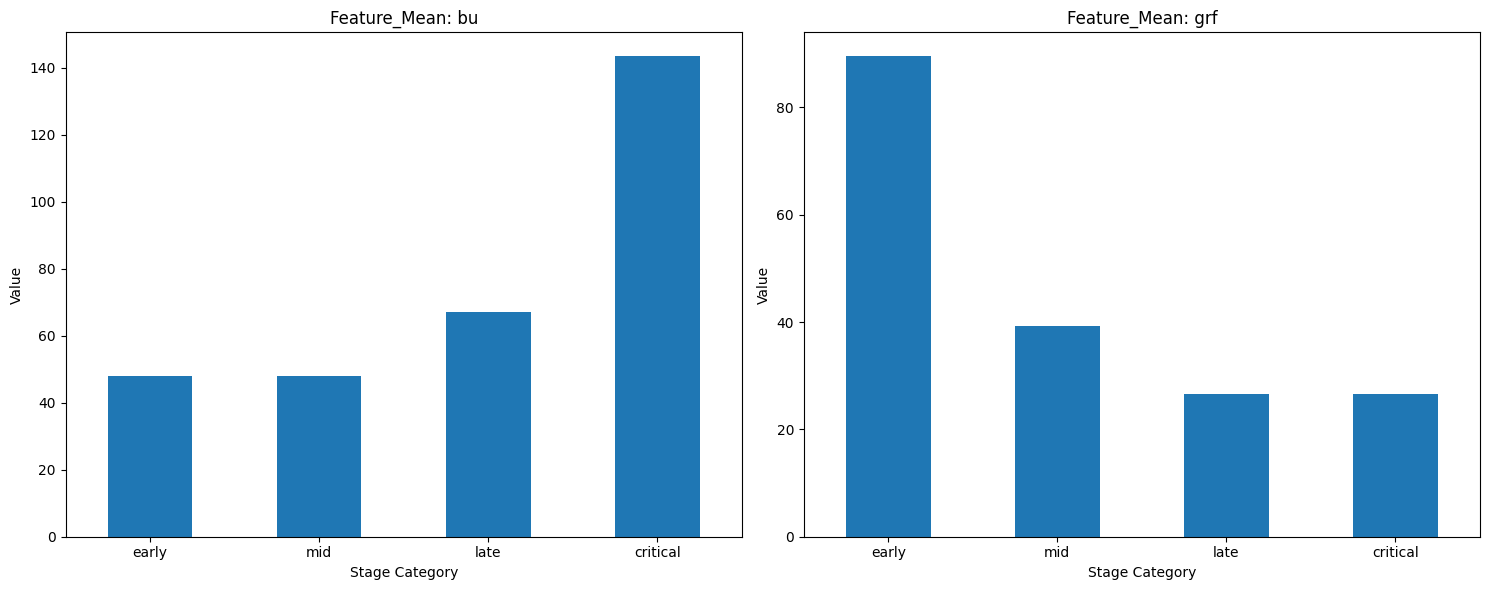

In [29]:
# Calculate the variance for each feature across stage categories using MEAN
variance_mean= transpose_stagecategory.var(axis= 1)

# Define a threshold for selecting features with significant changes
threshold_mean= variance_mean.mean()

# Select features with variance above the threshold
significant_features_mean= variance_mean[variance_mean > threshold_mean].index.tolist()

# Filter the DataFrame to include only the significant features
significant_data_mean= transpose_stagecategory.loc[significant_features_mean]

# Determine the number of significant features
num_features_mean= len(significant_features_mean)

# Create subplots based on the number of significant features
fig, axes= plt.subplots(1, num_features_mean, figsize=(15, 6))

# Plot each significant feature in a subplot
for ax, feature in zip(axes, significant_features_mean):
    significant_data_mean.loc[feature].plot(kind= "bar", ax= ax)
    ax.set_title(f'Feature_Mean: {feature}')
    ax.set_xlabel("Stage Category")
    ax.set_ylabel("Value")
    ax.set_xticks(range(len(significant_data_mean.columns)))
    ax.set_xticklabels(significant_data_mean.columns, rotation= 0)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

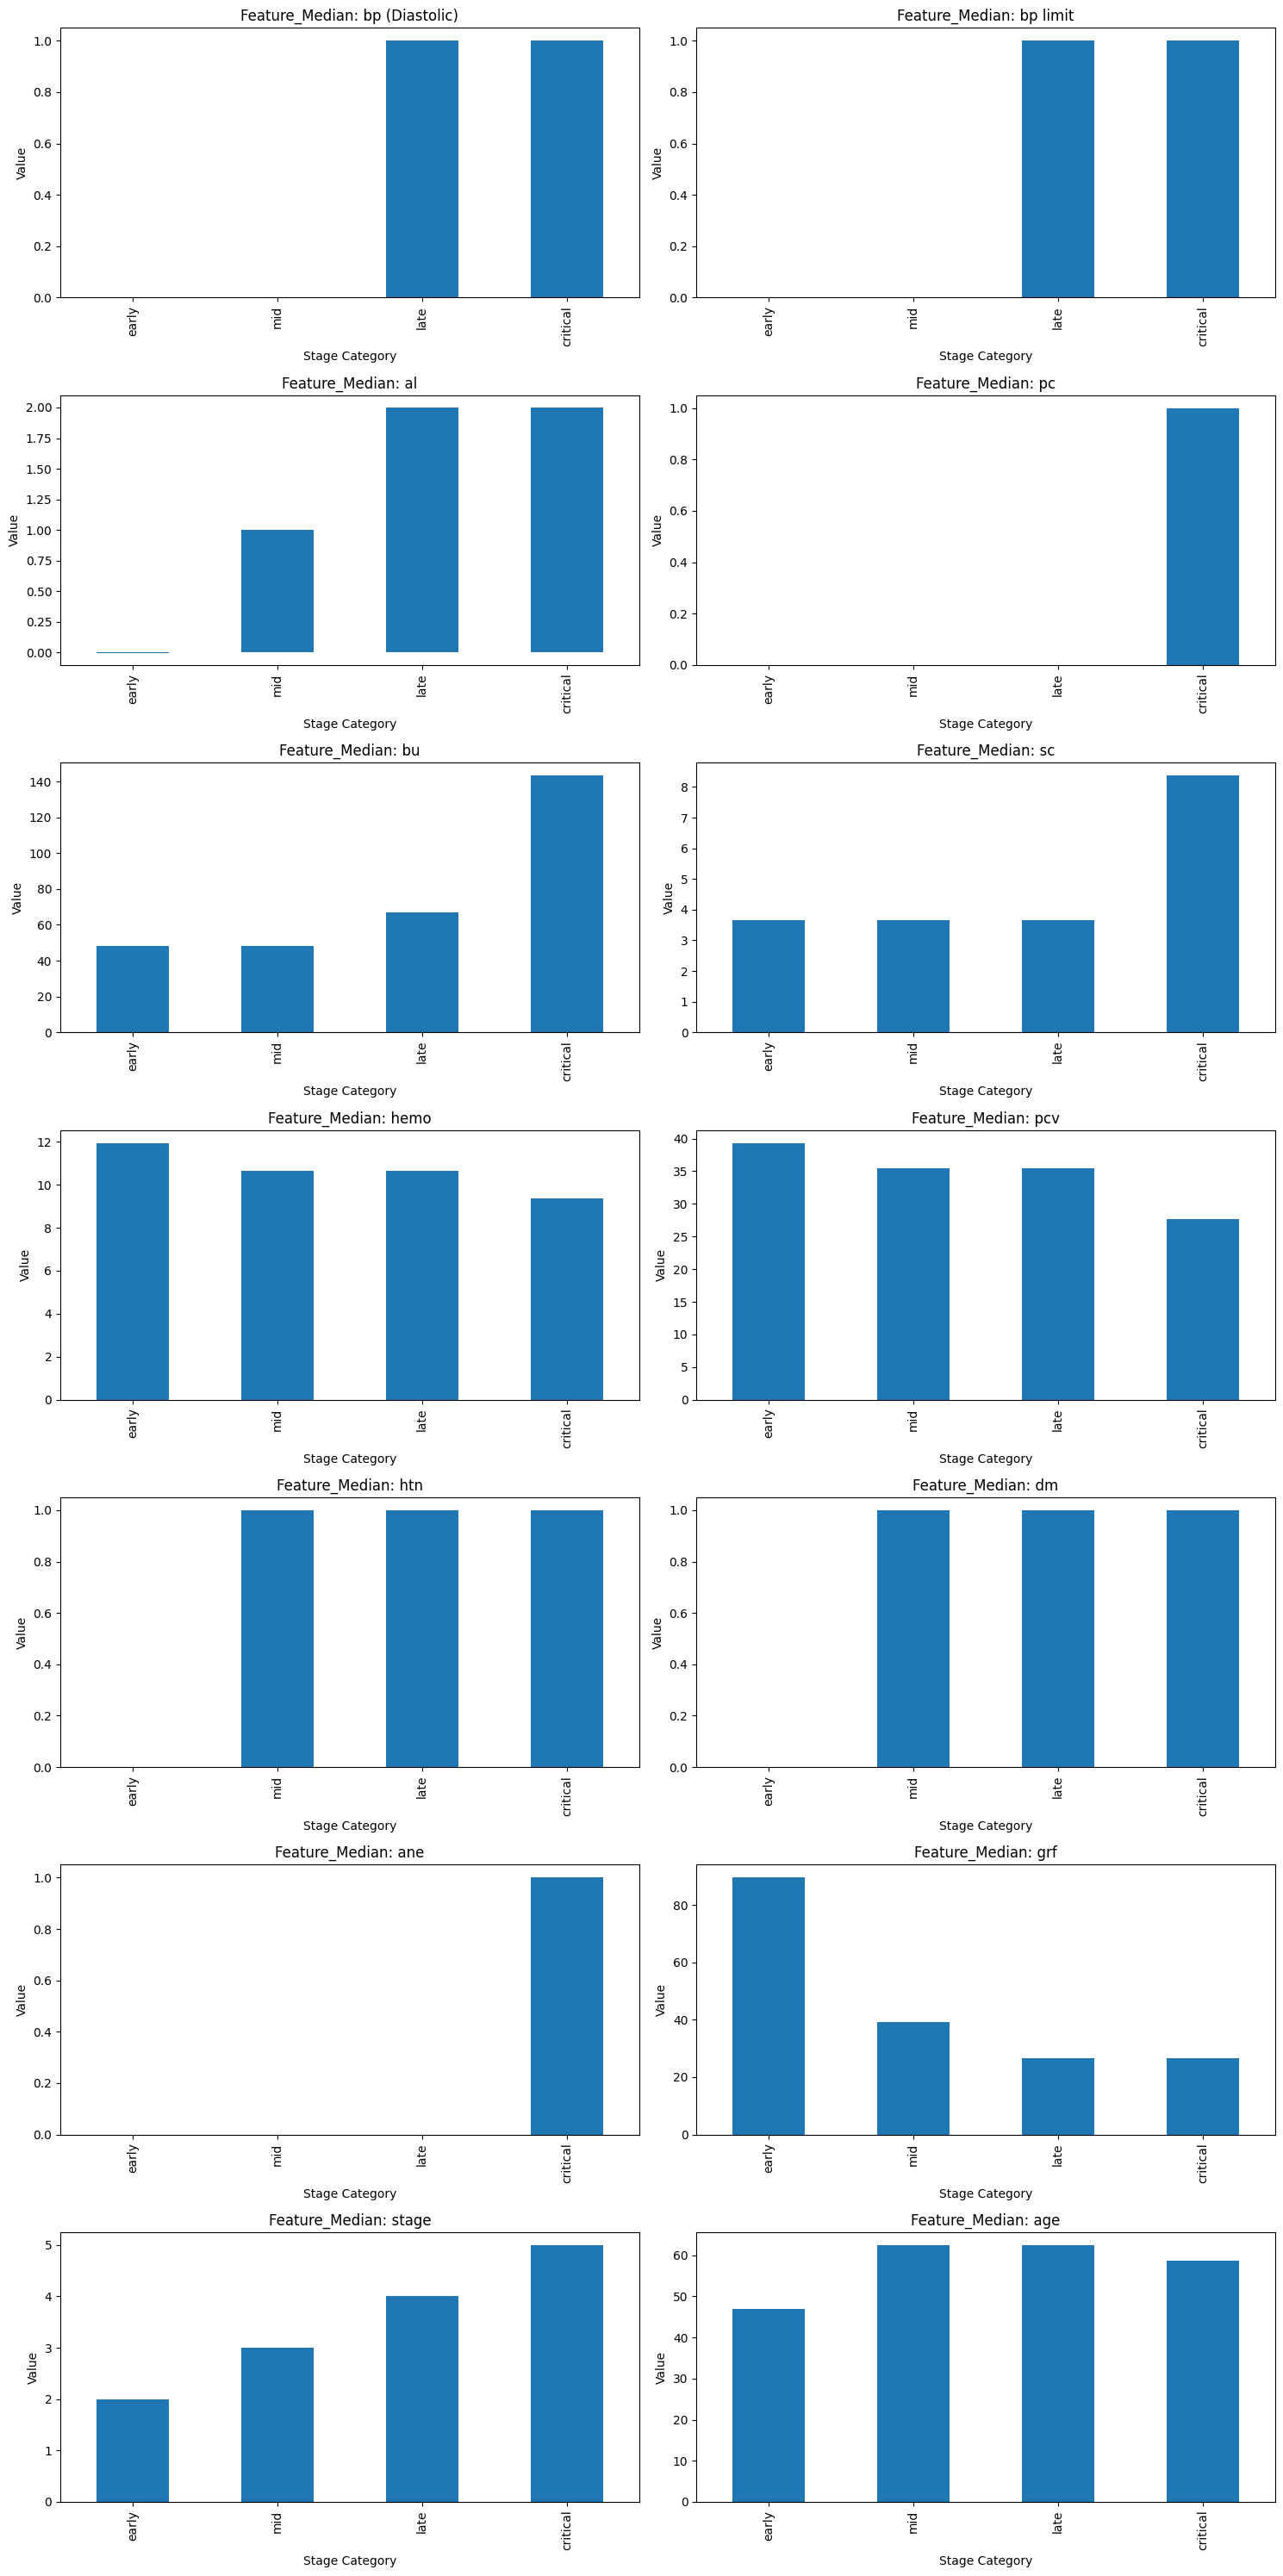

In [30]:
# Calculate the variance for each feature across stage categories with MEDIAN (Which features data changes the most in different stage)
variance_median= transpose_stagecategory.var(axis= 1)

# Define a threshold for selecting features with significant changes
threshold_median= variance_median.median()

# Select features with variance above the threshold
significant_features_median= variance_median[variance_median > threshold_median].index.tolist()

# Filter the DataFrame to include only the significant features
significant_data_median= transpose_stagecategory.loc[significant_features_median]

# Determine the number of significant features
num_features_median= len(significant_features_median)

# Set the number of rows and columns for the subplots
n_rows= 7
n_cols= 2

# Create subplots based on the number of significant features
fig, axes= plt.subplots(n_rows, n_cols, figsize=(15, 30))
axes= axes.flatten()

# Plot each significant feature in a subplot
for ax, feature in zip(axes, significant_features_median):
    significant_data_median.loc[feature].plot(kind= "bar", ax= ax)
    ax.set_title(f'Feature_Median: {feature}')
    ax.set_xlabel("Stage Category")
    ax.set_ylabel("Value")
    ax.set_xticks(range(len(significant_data_median.columns)))
    ax.set_xticklabels(significant_data_median.columns, rotation= 90)

# Remove empty subplots
for ax in axes[num_features_median:]:
    ax.remove()

plt.tight_layout()
plt.show()

In [31]:
# Extract serum creatinine data from negative sample
sc_negative_mean= negative_sample[["sc"]].mean()
sc_negative_median= negative_sample[["sc"]].median()

# Print the result
print(f'Average_serum_creatinine: {sc_negative_mean}')
print(f'Median_serum_creatinine: {sc_negative_median}')

Average_serum_creatinine: sc    3.649
dtype: float64
Median_serum_creatinine: sc    3.649
dtype: float64


**Finding for Assumption 1:**

**MEAN** data:

(a) After categorising the data into different stage category, we learn that the later the stage, the higher the blood urea (bu) on average.

(b) We also learn that the later the stage, the lower the glomeruler filteration rate (gfr) on average.


**MEDIAN** data:

(a) On median, we found that both late and critical patient who has chronic kidney disease result 1.0 for both the blood pressure (diastolic and limit).

(b) Albumin (al) and blood urea (bu) shown an upward trends as disease stages advanced.

(c) Hemoglobin (hemo), packed cell volume (pcv) and glomerular filteration rate (gfr) shown a downward trends as disease stages advanced.


**NOT OBVIOUS OBSERVATION** that may be helpful in determining the stage category of kidney disease:

(a) For Serum creatinine (sc), while sc detected at around 3.5 for early stage, mid, stage and late stage, it only spike to 8 at critical stage.

- This mean that by relying solely on the positive sample (chronic kidney disease), sc is not sufficient to serve as a early highlight of potential kidney disease.

- When comparing to negative sample not chronic kidney disease), we realised that the negative sample sc is similar to positive sample sc early, mid, and late stage, therefore, sc itself do not have sufficient evidence to be used effectively as an early indicator of chronic kidney disease.

(b) 1.0 Hypertension (htn) and Diabetes Mellitus (dm) symptoms appears to those patients who are in mid, late , and critical stage of kidney disease among patient who has chronic kidney disease.

- This does not explain the direct relationship to the kidney disease, where further examination is needed.


#**Assumption 2: Is sodium and sugar level a good indicator of chronic kidney disease?**

In [32]:
# Examining class with sodium and sugar level
# Extract classes and store in a dictionary
classes= {}
unique_classes= df2["class"].unique()

for cls in unique_classes:
    classes[cls]= df2[df2["class"]== cls][["sod", "su"]]
    classes[cls]["class"]= cls

# Concatenate all the class-specific DataFrames into a single DataFrame
sod_su_class= pd.concat(classes.values(), ignore_index= True)

# Creating a column for mean, median, and standard deviation data for both sodium and sugar
sod_su_class_stats= sod_su_class.groupby("class").agg({
    "sod": ["mean", "median", "std"],
    "su": ["mean", "median", "std"]
}).reset_index()

# Rearrange dataframe columns
sod_su_class_stats.columns= ["class",
                        "sodium_mean", "sodium_median", "sodium_std",
                        "sugar_mean", "sugar_median", "sugar_std"]
sod_su_class_stats

# Interpretation:
# (a) Sugar levels are very consistent among those not chronic patient, with standard deviation remain at 0.
# (b) An important finding is that the average sugar level for chronic kidney patient is 0.65, which is significant higher than not chronic patient.
# (c) Among the patient data, we also noticed that there is 1.28 variation on sugar level among other patient.

<IPython.core.display.Javascript object>

class  sodium_mean  sodium_median  sodium_std  sugar_mean  sugar_median  \
0    0.0   141.611111          140.5    5.119847   -0.001000        -0.001   
1    1.0   135.007850          135.5    5.791122    0.652787        -0.001   

   sugar_std  
0   0.000000  
1   1.276744

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

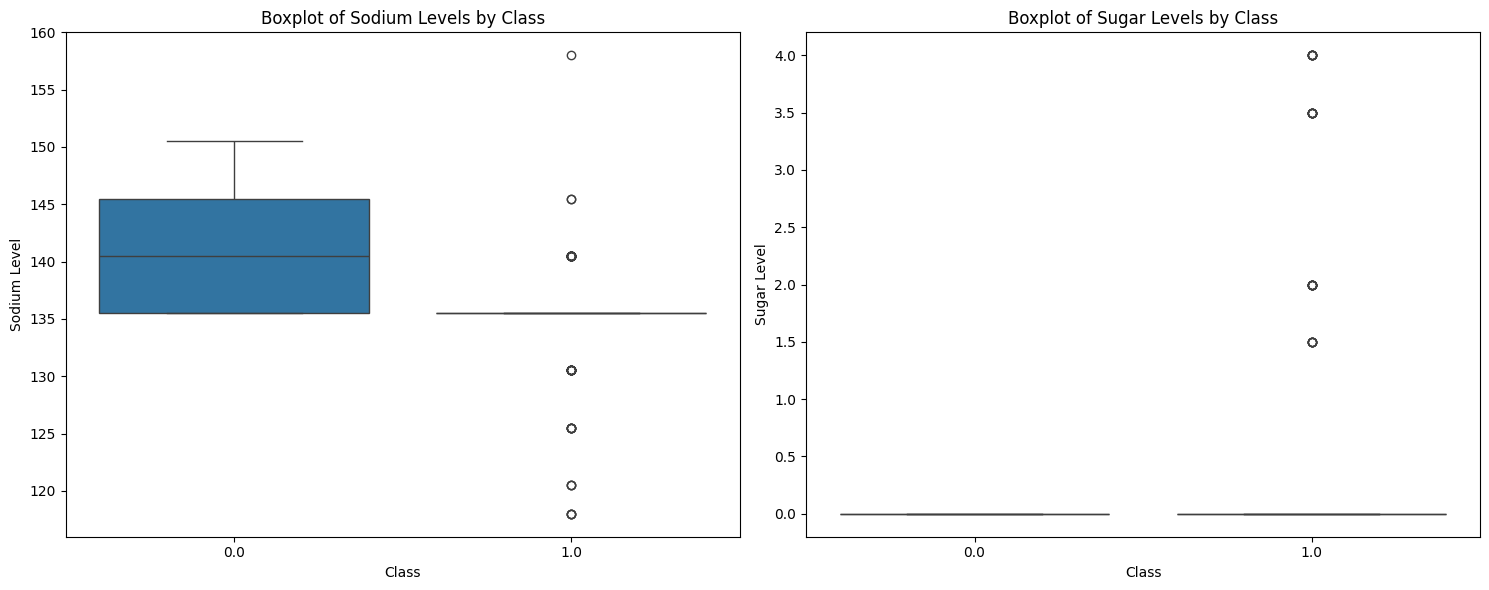

In [33]:
# Visualise the data with a boxplots
fig, axes= plt.subplots(1, 2, figsize=(15, 6)) # the 1, 2 allow to create the chart side by side, by presenting, 1 row and 2 columns

# Plotting sodium level boxplot for different classes
sns.boxplot(ax= axes[0], x= "class", y= "sod", data= df2)
axes[0].set_title("Boxplot of Sodium Levels by Class")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Sodium Level")

# Plotting suagr level boxplot for different classes
sns.boxplot(ax= axes[1], x= "class", y= "su", data= df2)
axes[1].set_title("Boxplot of Sugar Levels by Class")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Sugar Level")

plt.tight_layout()
plt.show()

# Interpretation: (change the second chart)
# (a) From what we can see, among the patient who has kidney disease, a number of them are having extreme level of sodium and sugar level, while healthy individual's sodium and sugar level are rmeian in a consistent range.

**Finding for Assumption 2:**

(a) When comparing both sodium and sugar level among the chronic kidney patient and chronic kidney patient (class), we found that the average sugar level for diagnosed kidney patient is significant higher than healthy individual (0.652787 vs -0.001).


#**Assumption 3: Is urine test more efficient in identify chronic kidney diseases than a blood test?**

In [34]:
# Make a new copy of df2
df4= df2.copy()

# Commonly used metrics/ ratios
# Blood Test
df4["sodium_potassium_ratio"]= df4["sod"] / df4["pot"]
df4["mean_arterial_pressure"]= (df4["bp (Diastolic)"] + 2 * df4["bp limit"]) / 3

# Uncommon used metrics
# Blood Test
df4["hemo_rbcc_ratio"]= df4["hemo"] / df4["rbcc"]
df4["wbc_rbc_ratio"]= df4["wbcc"] / df4["rbcc"] # Indirect metric
df4["rbc_hemo_ratio"]= df4["rbcc"] / df4["hemo"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

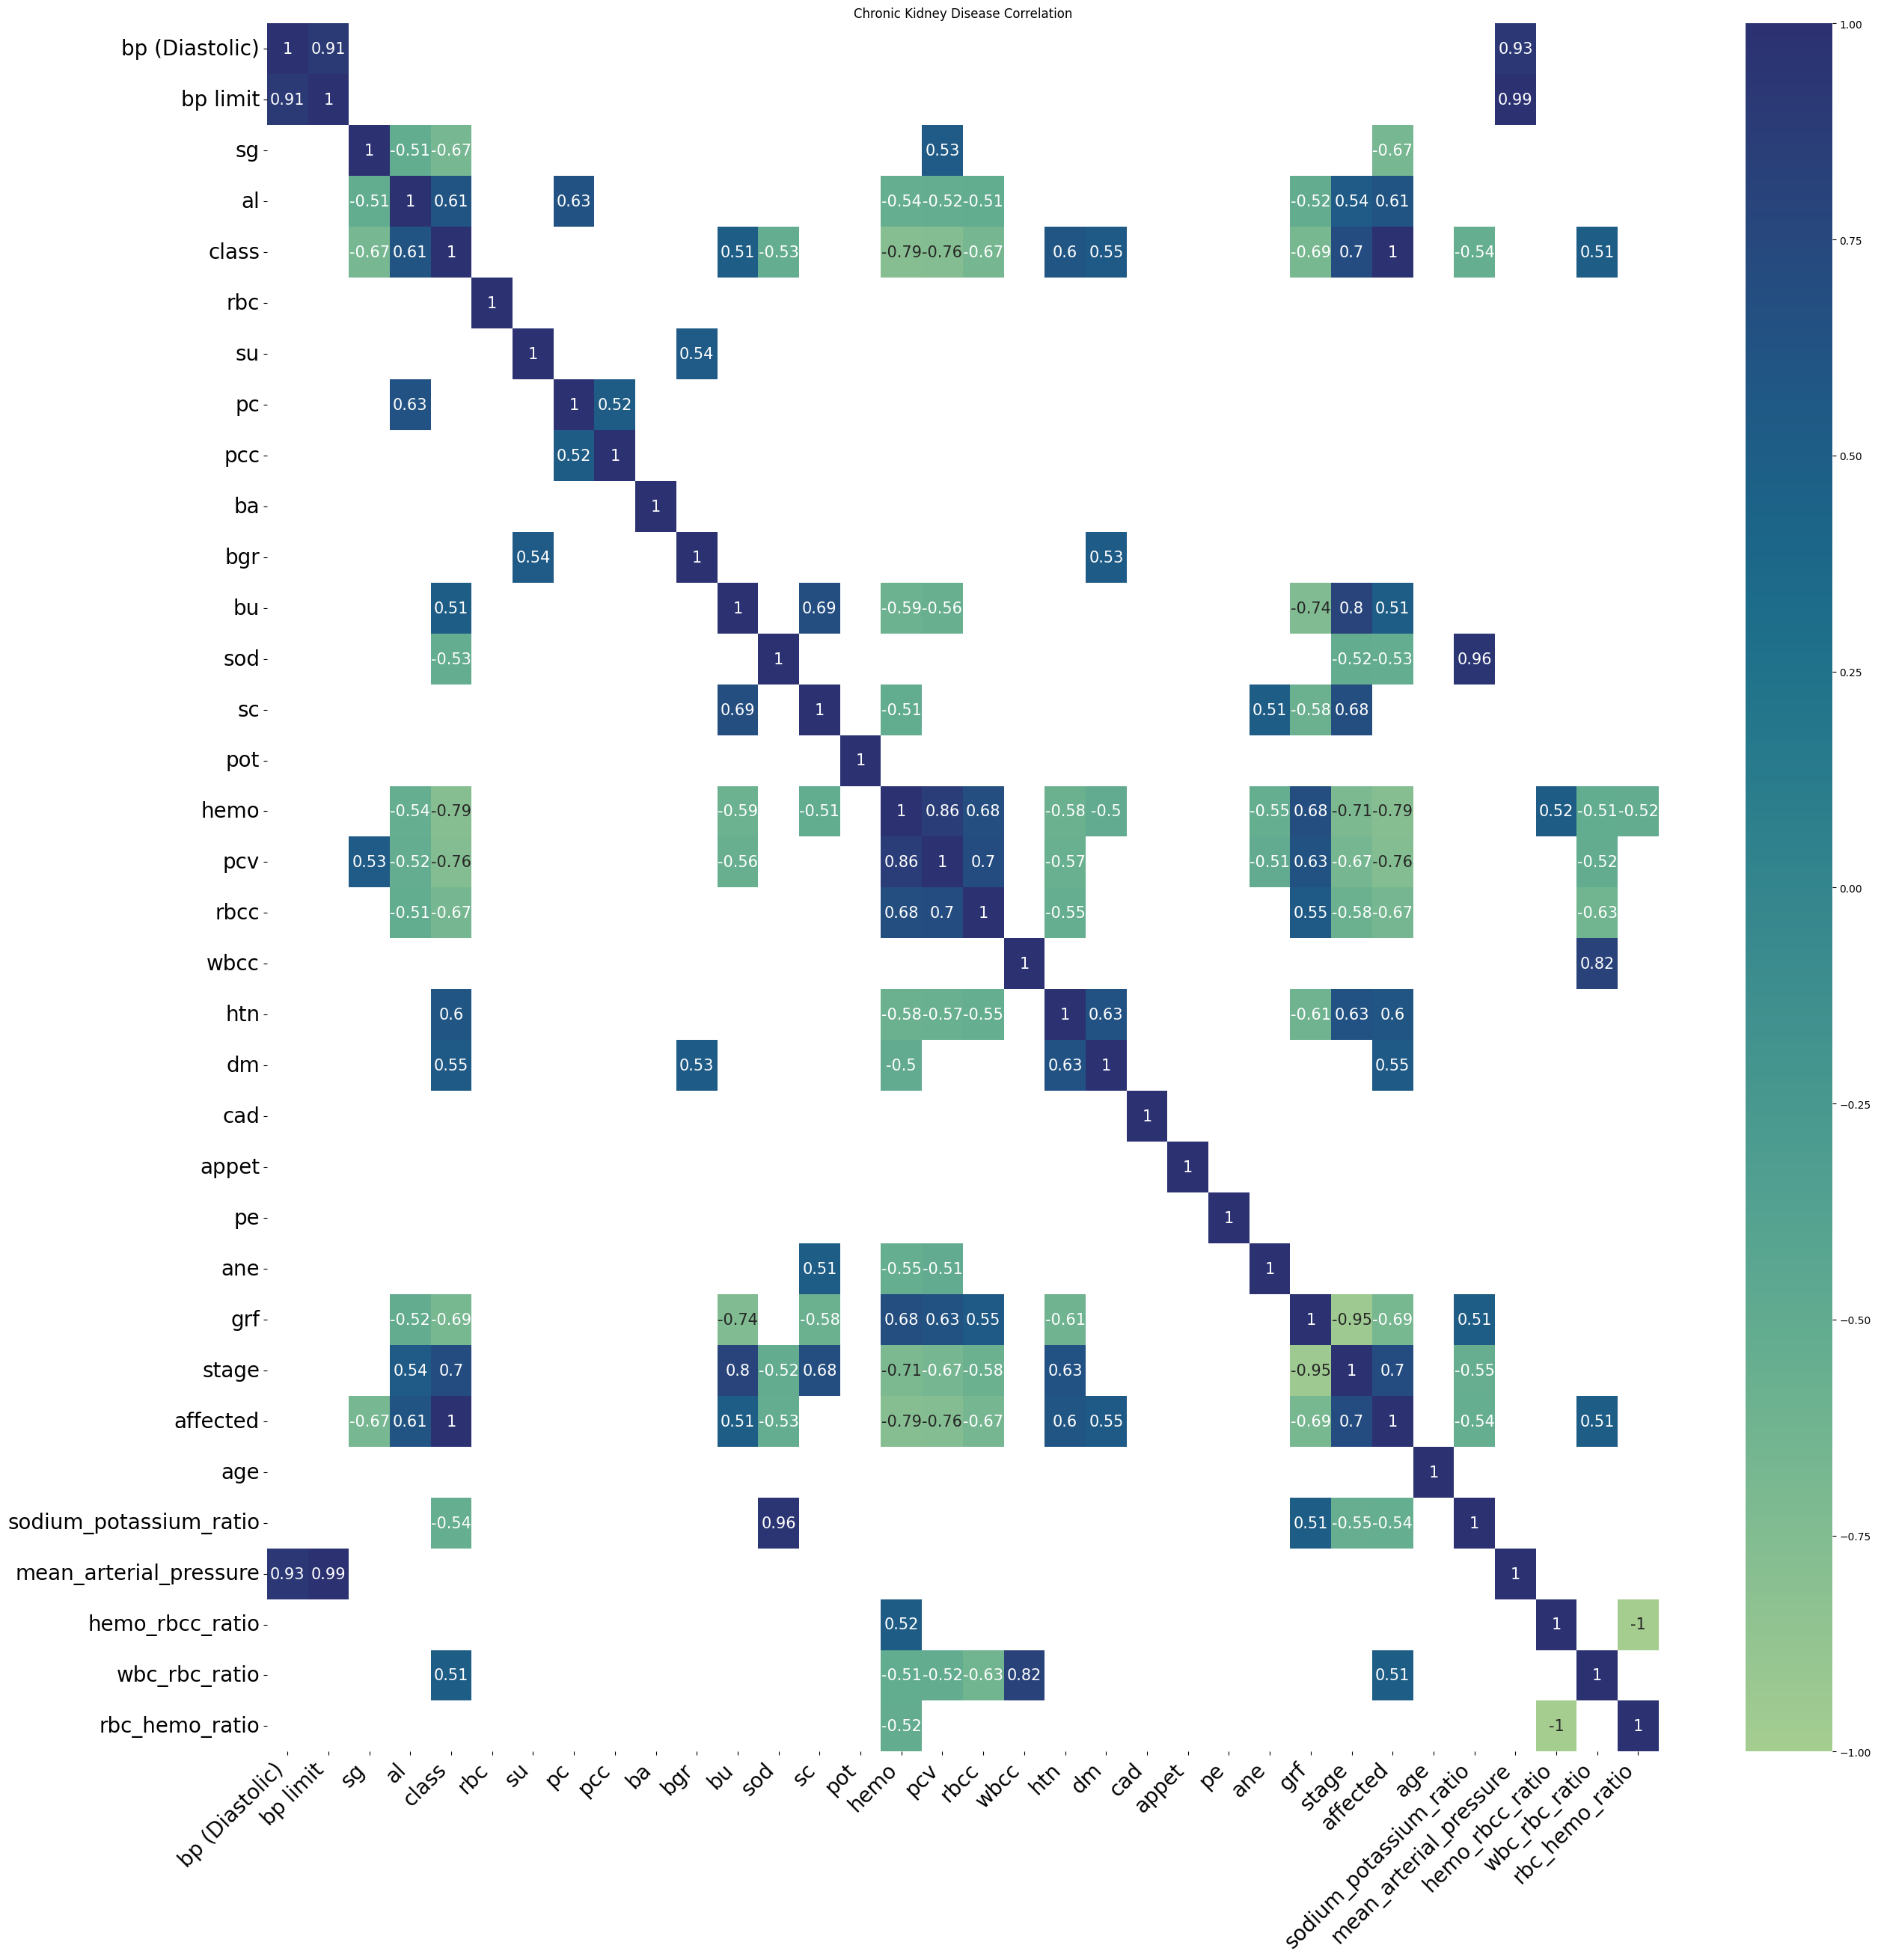

In [35]:
# Creating spearman correlation
spearman= df4.corr(method= "spearman")

# Mask values where the absolute correlation is less than 0.5
spearman_masked= spearman.where(np.abs(spearman) > 0.5)
plt.figure(figsize=(30, 30))
spearman_heatmap= sns.heatmap(spearman_masked, annot=True, cmap="crest", annot_kws={"size": 15})
spearman_heatmap.set_xticklabels(spearman_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
spearman_heatmap.set_yticklabels(spearman_heatmap.get_yticklabels(), rotation=0, fontsize=20)

# Show the plot
plt.title("Chronic Kidney Disease Correlation")
plt.show()

# Strong correlation: 0.75 and above
# hemo -0.79
# pcv -0.76

# Moderate correlation: 0.50 to 0.75
# grf -0.70
# sg -0.67
# al 0.61
# grf -0.70
# rbcc -0.67
# htn 0.60

# Interpretation:
# From the correlation, we can see that blood examined test shown a negative relationship to class (1,0)
# For urine examined test, albumin show a positive relationship to class (1,0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

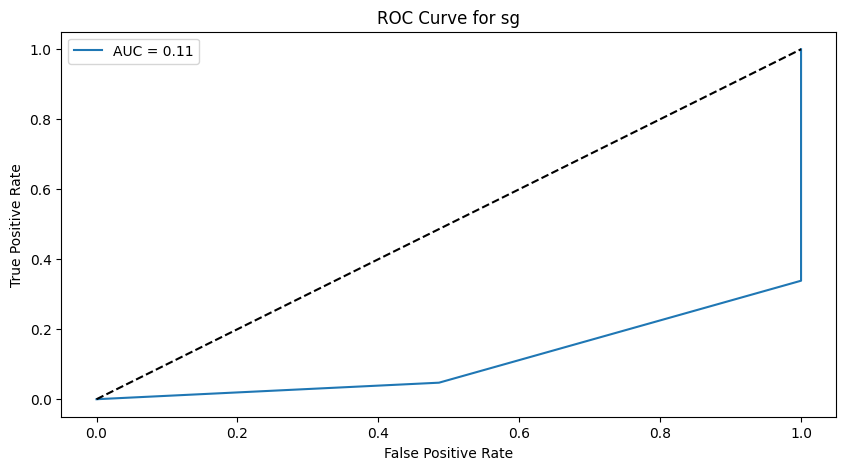

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

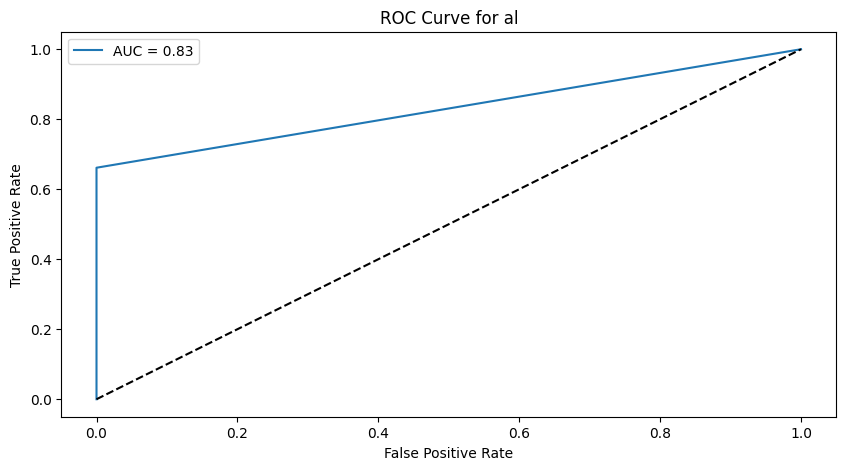

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

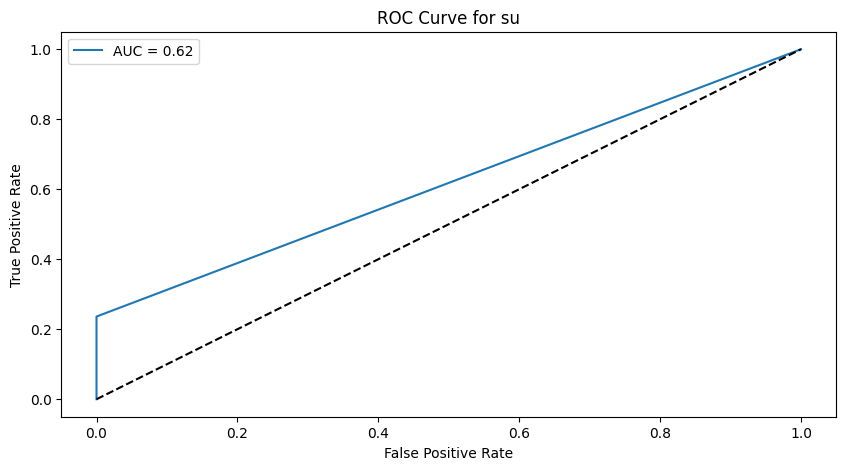

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

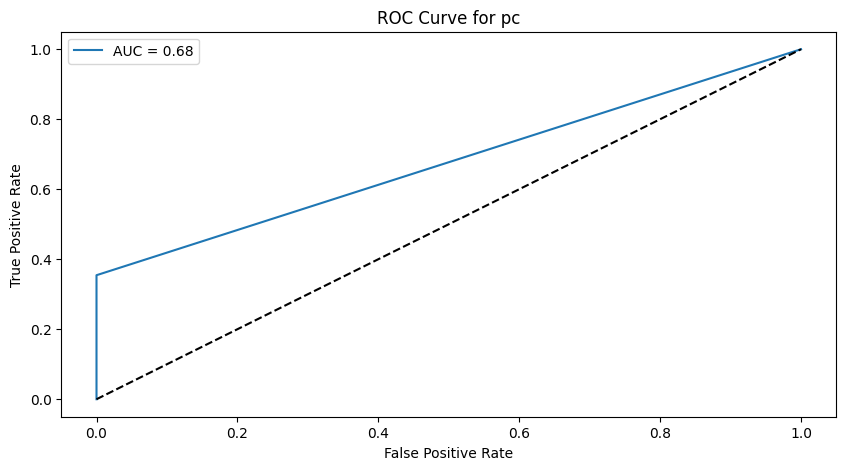

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

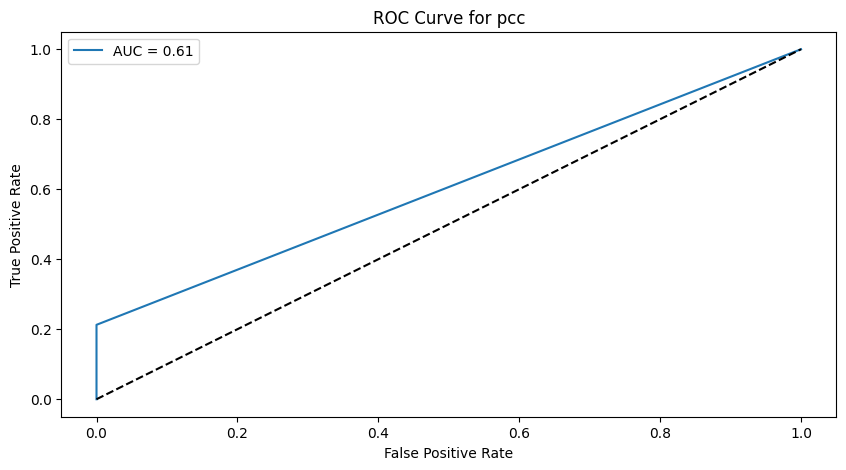

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

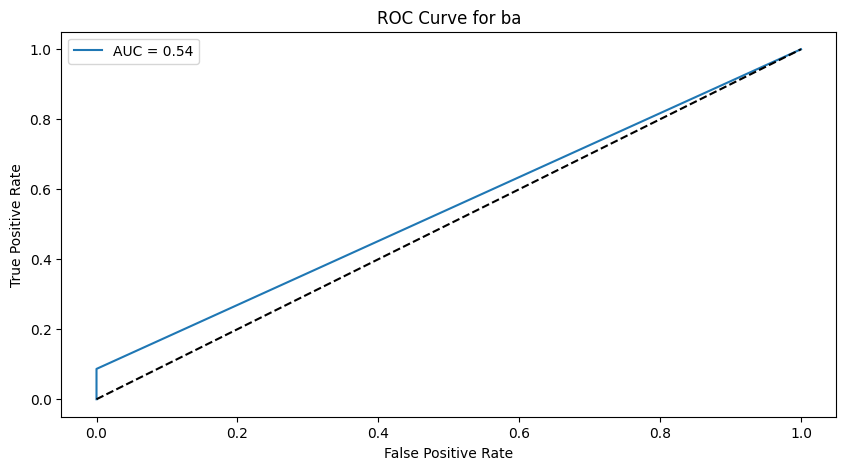

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

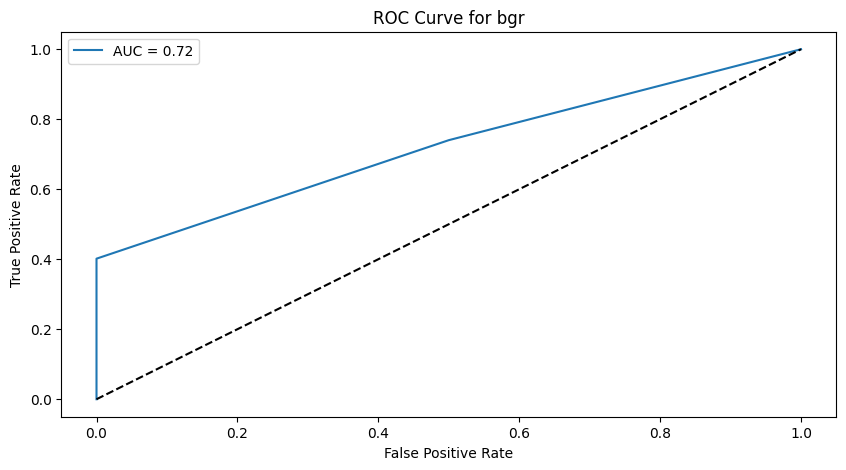

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

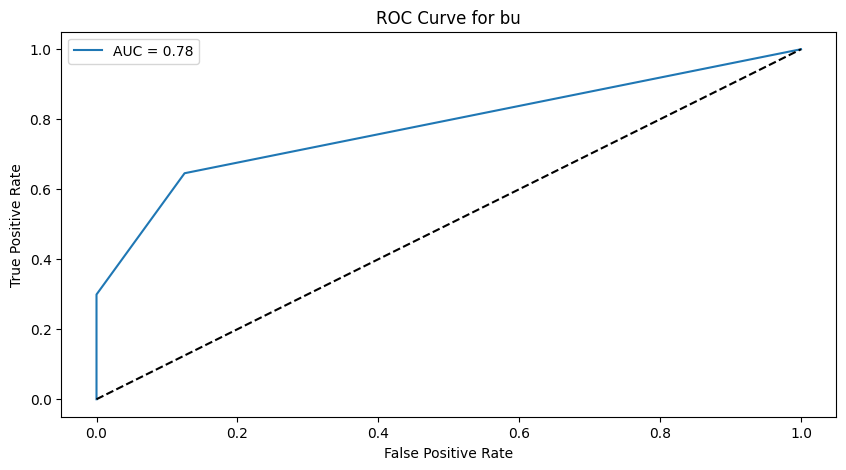

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

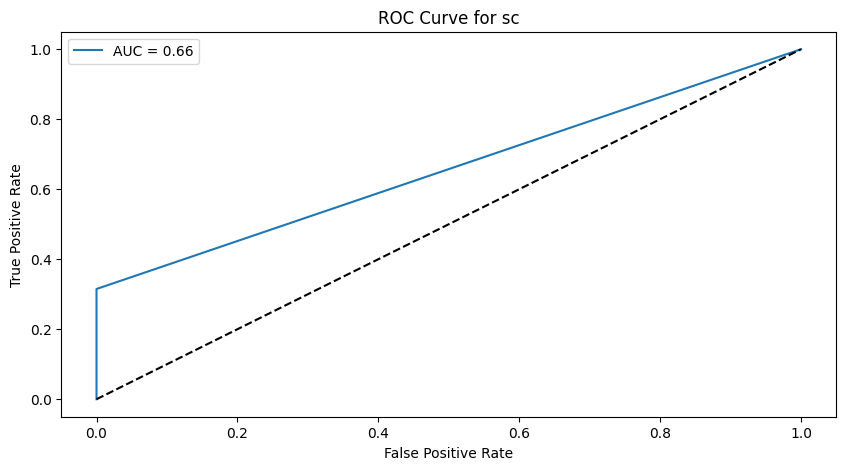

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

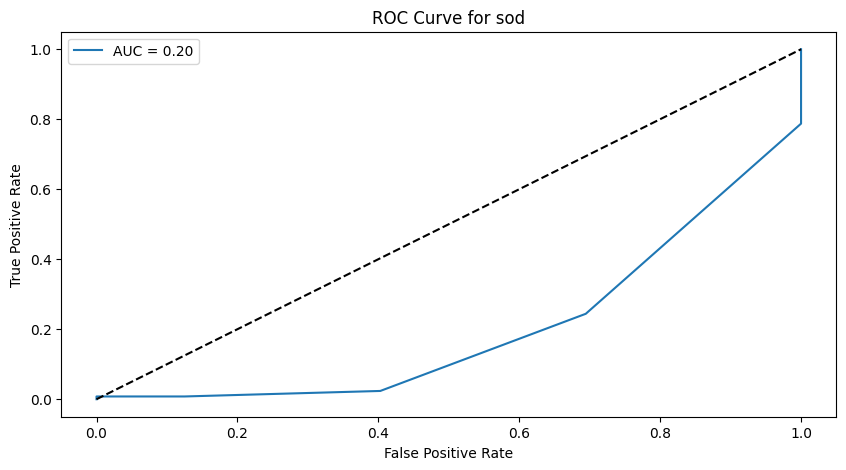

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

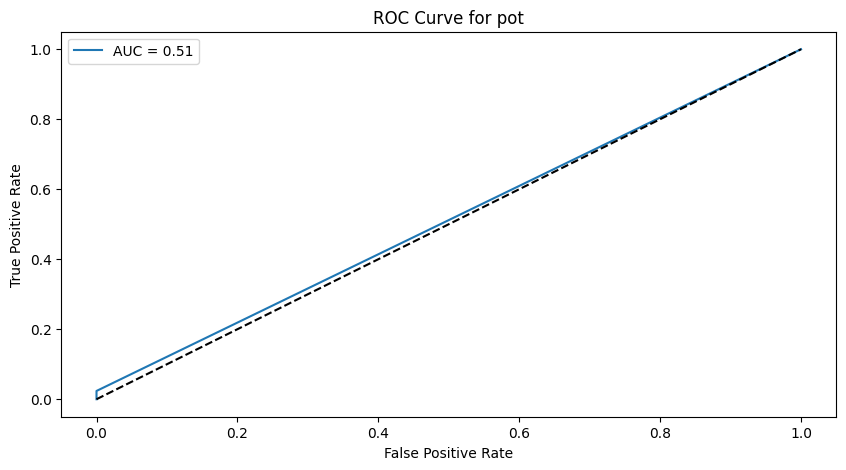

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

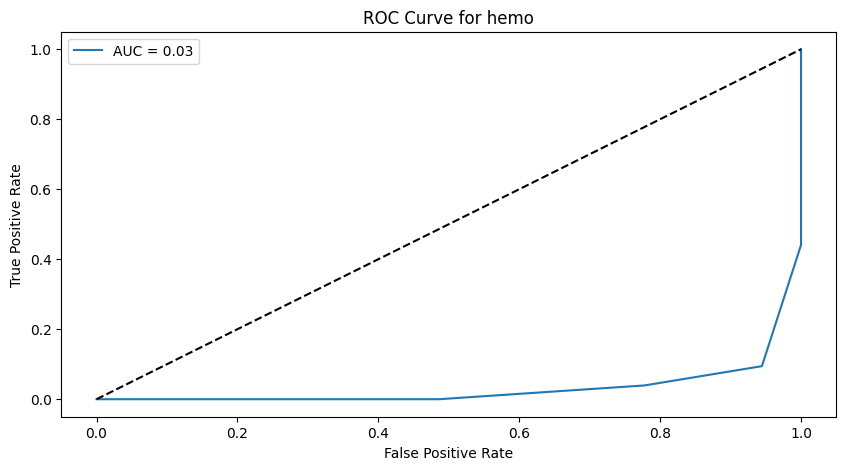

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

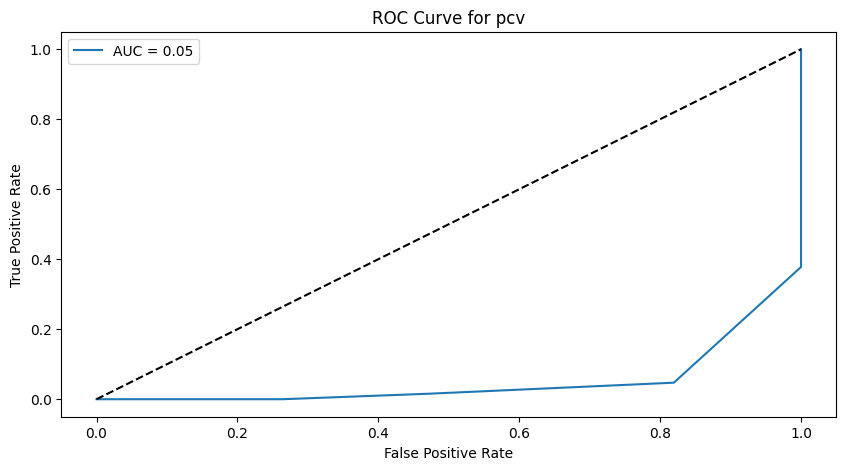

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

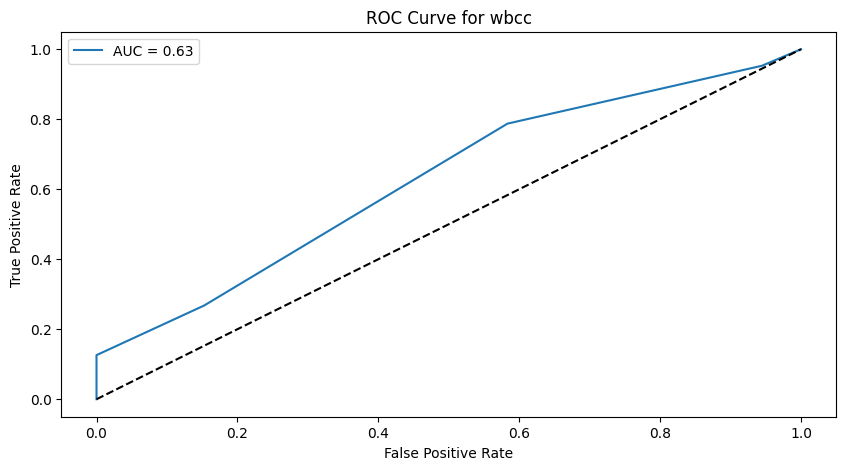

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

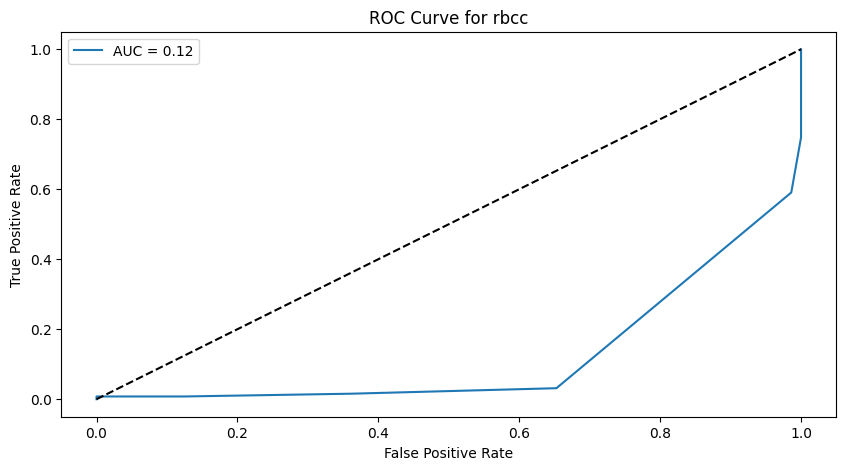

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

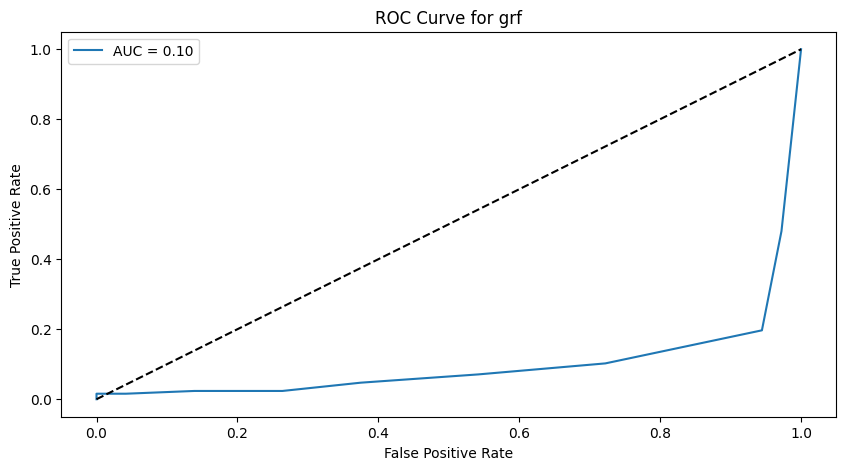

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

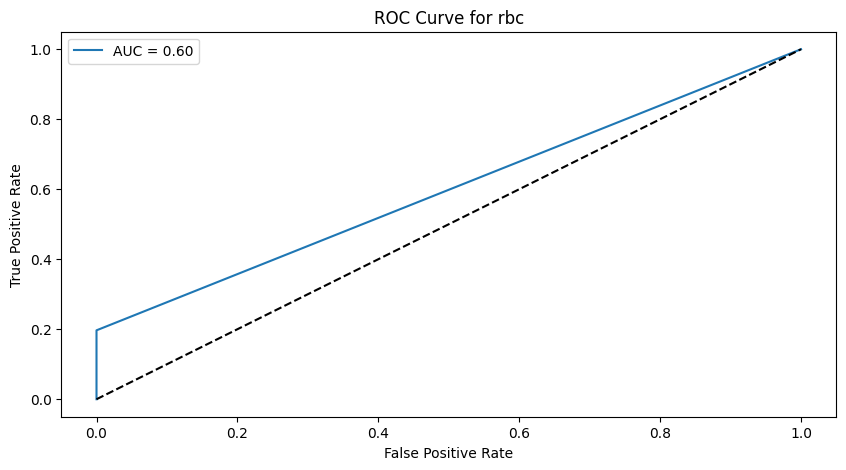

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

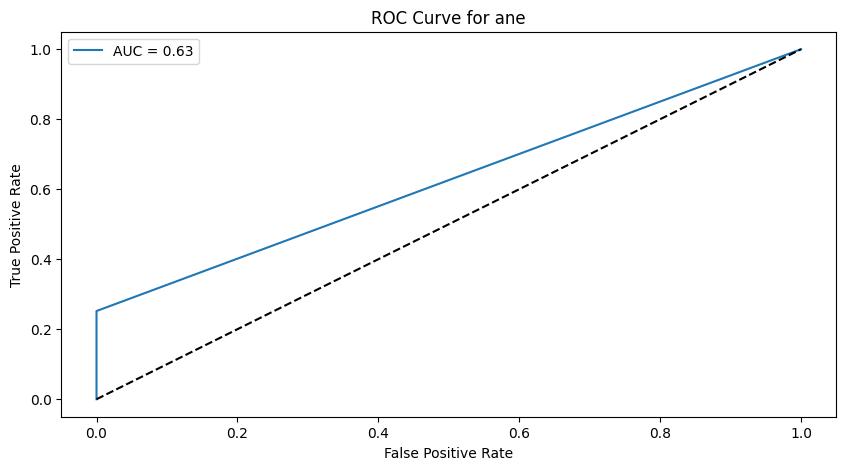

In [36]:
# Use of ROC curve to understand the diagnostic ability of features
# Specify the urine and blood test features
from sklearn.metrics import roc_curve, roc_auc_score

urine_features = ["sg", "su", "pc", "pcc", "ba"]
blood_features = ["bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc", "grf", "rbc", "ane", "al"]

# Function to plot ROC curve for multiple features
def plot_roc_curves(features, y_true, df):
    for feature in features:
        y_score = df[feature]
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc = roc_auc_score(y_true, y_score)
        plt.figure(figsize=(10, 5))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {feature}')
        plt.legend()
        plt.show()

# Plot ROC curves for urine and blood test features
plot_roc_curves(urine_features, df4['class'], df4)
plot_roc_curves(blood_features, df4['class'], df4)

# Interpretation:
# Considering 0.70 and above is the optimal level for predictive power, thus we will be selecting:
# Albumin: 0.83
# Blood Glucose Random: 0.72
# Blood Urea: 0.78

**Finding on Assumption 3:**

(a) It is unfair to mentioned whether urine-examined test has more predictive power than blood-examine test given that the number of blood examined test is higher than urine-examined test.

(b) From correlation result, we found that hemogloblin (hem) and packed cell volumne (pcv) has a strong correlation correlation, which above -0.75.

(c) From the ROC curve result, we found that albumin (al), blood urea (bu), and blood glucose random (bgr) has a predictive power of more than 0.70.

(d) While we may not directly able to say whether blood or urine has more predictive power given the number of examined test by urine and blood is not parallel, however, based on our sample, we can say that blood-examined test is more efficient in identifying chronic kidney disease than urine test if class is the target label.

#**Assumption 4: Can bgr and dm help tell us anything about the stage of kidney disease?**

In [37]:
# Analyse class to Blood Glucose Random and Diabetes Mellitus
def calculate_statistics(sample, column_name):
    """Calculate median and mean for a given column in a sample."""
    median= sample[column_name].median()
    mean= sample[column_name].mean()
    return median, mean

# Calculate statistics for both positive and negative samples
median_positive_bgr, mean_positive_bgr= calculate_statistics(positive_sample, "bgr")
median_positive_dm, mean_positive_dm= calculate_statistics(positive_sample, "dm")
median_negative_bgr, mean_negative_bgr= calculate_statistics(negative_sample, "bgr")
median_negative_dm, mean_negative_dm= calculate_statistics(negative_sample, "dm")

# Create dataframes for comparison
# Median bgr and dm data
median_bgr_dm= {"Sample": ["Positive", "Negative"],
                "Median_BGR": [median_positive_bgr, median_negative_bgr],
                "Median_DM": [median_positive_dm, median_negative_dm]}

median_bgr_dm= pd.DataFrame(median_bgr_dm)

# mean bgr and dm data
mean_bgr_dm= {"Sample": ["Positive", "Negative"],
              "Mean_BGR": [mean_positive_bgr, mean_negative_bgr],
              "Mean_DM": [mean_positive_dm, mean_negative_dm]}

mean_bgr_dm= pd.DataFrame(mean_bgr_dm)

# Merge the dataframe for easy comparison
median_mean_bgr_dm= pd.merge(median_bgr_dm, mean_bgr_dm, on= "Sample")
median_mean_bgr_dm

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sample  Median_BGR  Median_DM    Mean_BGR   Mean_DM
0  Positive    133.0000        1.0  177.645433  0.543307
1  Negative    122.4995        0.0  122.499500  0.000000

In [38]:
# Analyse stage to Blood Glucose Random and Diabetes Mellitus
stage_bgr_dm= positive_sample.groupby("stage").agg({"bgr": ["median", "mean"],
                                                    "dm": ["median", "mean"]}).reset_index()
# Rearrange the order of columns
stage_bgr_dm.columns= ["stage", "Median_bgr", "Mean bgr", "Median dm", "Mean dm"]
stage_bgr_dm

stage  Median_bgr    Mean bgr  Median dm   Mean dm
0    1.0       133.0  128.332889        0.0  0.333333
1    2.0       133.0  183.749750        0.0  0.333333
2    3.0       133.0  185.160935        1.0  0.580645
3    4.0       133.0  194.463366        1.0  0.585366
4    5.0       133.0  161.411471        1.0  0.588235

In [39]:
# Analyse stage to Blood Glucose Random and Diabetes Mellitus using negative sample (Not CKD)
stage_bgr_dm_neg= negative_sample.groupby("stage").agg({"bgr": ["median", "mean"],
                                                    "dm": ["median", "mean"]}).reset_index()
# Rearrange the order of columns
stage_bgr_dm_neg.columns= ["stage", "Median_bgr", "Mean bgr", "Median dm", "Mean dm"]
stage_bgr_dm_neg

stage  Median_bgr    Mean bgr  Median dm  Mean dm
0    1.0     111.999  121.799467        0.0      0.0
1    2.0     111.999  122.042957        0.0      0.0
2    4.0     133.000  133.000000        0.0      0.0

**Finding on Assumption 4:**

(a) While bgr itself, it cannot directly indicate the chance of presence of chronic kidney disease,however, average dm higher than 0 could be potentially an early indicator of chronic kidney disease.

#**Assumption 5: How effectively assessing inflammation levels such as: pc, pcc, ba, and wbcc in determining chronic kidney disease?**

In [40]:
# In comparing the inflammation sample from both chronic and not chronic patient
# Extract both positive and negative inflammation sample
inflammation_positivesample= positive_sample[["pc", "pcc", "ba", "wbcc"]]
inflammation_negativesample= negative_sample[["pc", "pcc", "ba", "wbcc"]]

# Extract inflammation data
# Positive sample
inflammation_positivestage= positive_sample.groupby("stage").agg(pc_median= ("pc", "median"),
                                                                 pc_mean= ("pc", "mean"),
                                                                 pcc_median= ("pcc", "median"),
                                                                 pcc_mean= ("pcc", "mean"),
                                                                 ba_median= ("ba", "median"),
                                                                 ba_mean= ("ba", "mean"),
                                                                 wbcc_median= ("wbcc", "median"),
                                                                 wbcc_mean= ("wbcc", "mean")).reset_index()

# Negative sample
inflammation_negativestage= negative_sample.groupby("stage").agg(pc_median= ("pc", "median"),
                                                                 pc_mean= ("pc", "mean"),
                                                                 pcc_median= ("pcc", "median"),
                                                                 pcc_mean= ("pcc", "mean"),
                                                                 ba_median= ("ba", "median"),
                                                                 ba_mean= ("ba", "mean"),
                                                                 wbcc_median= ("wbcc", "median"),
                                                                 wbcc_mean= ("wbcc", "mean")).reset_index()

# Print the positive inflammtaion data
inflammation_positivestage

stage  pc_median   pc_mean  pcc_median  pcc_mean  ba_median   ba_mean  \
0    1.0        0.0  0.111111         0.0  0.000000        0.0  0.111111   
1    2.0        0.0  0.166667         0.0  0.000000        0.0  0.000000   
2    3.0        0.0  0.290323         0.0  0.290323        0.0  0.096774   
3    4.0        0.0  0.341463         0.0  0.268293        0.0  0.073171   
4    5.0        1.0  0.558824         0.0  0.205882        0.0  0.117647   

   wbcc_median    wbcc_mean  
0       8550.0  9607.777778  
1       8550.0  9045.833250  
2       8550.0  8933.870903  
3       8550.0  9594.878049  
4       8550.0  9109.999941

In [41]:
# # Print the negative inflammtaion data
inflammation_negativestage

stage  pc_median  pc_mean  pcc_median  pcc_mean  ba_median  ba_mean  \
0    1.0        0.0      0.0         0.0       0.0        0.0      0.0   
1    2.0        0.0      0.0         0.0       0.0        0.0      0.0   
2    4.0        0.0      0.0         0.0       0.0        0.0      0.0   

   wbcc_median    wbcc_mean  
0       8550.0  7756.666622  
1       8550.0  8084.347783  
2       7360.0  7657.499750

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

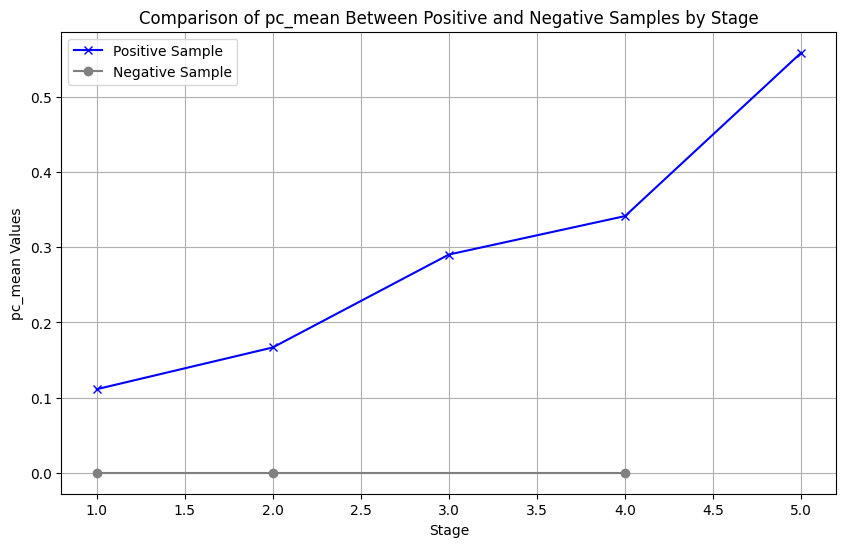

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

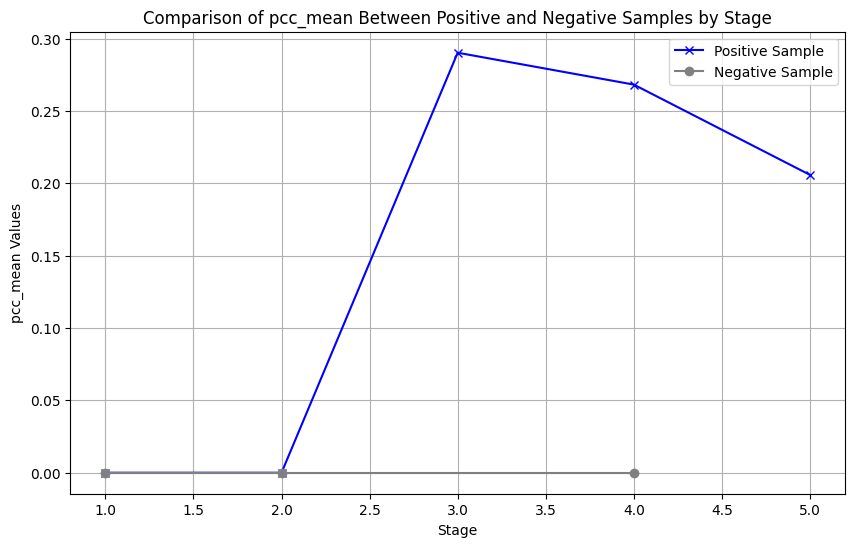

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

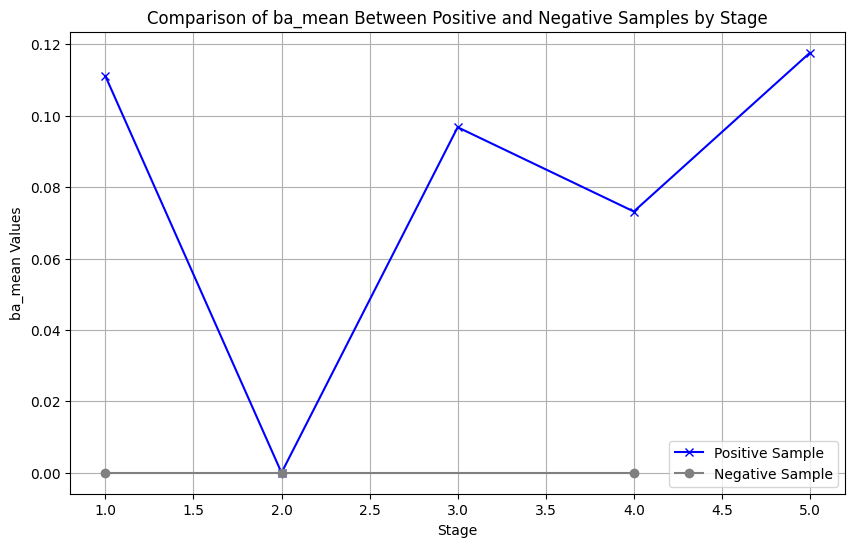

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

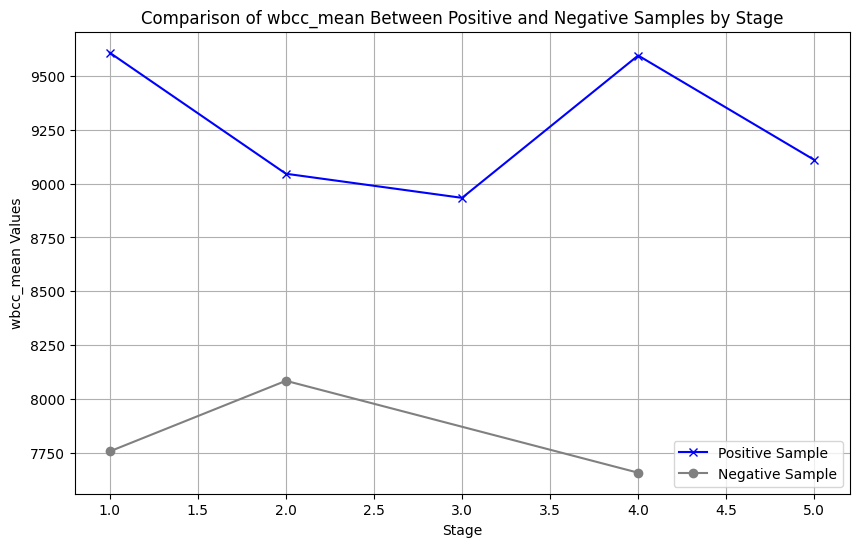

In [42]:
# Comparing the data in chart with only MEAN data
mean_columns = ['pc_mean', 'pcc_mean', 'ba_mean', 'wbcc_mean']

# Plotting
for col in mean_columns:
    plt.figure(figsize=(10, 6))
    # Plot positive sample
    # Plot positive sample
    plt.plot(inflammation_positivestage['stage'], inflammation_positivestage[col], color='blue', marker='x', label='Positive Sample')

# Plot negative sample
    plt.plot(inflammation_negativestage['stage'], inflammation_negativestage[col], color='grey', marker='o', label='Negative Sample')

    plt.xlabel('Stage')
    plt.ylabel(f'{col} Values')
    plt.title(f'Comparison of {col} Between Positive and Negative Samples by Stage')
    plt.legend()
    plt.grid(True)
    plt.show()

In [43]:
# Creating an extra column indicate positive and negative sample
inflammation_positivestage["condition"]= "positive"
inflammation_negativestage["condition"]= "negative"

# Combine the dataframes
inflammationsample_pos_neg= pd.concat([inflammation_positivestage, inflammation_negativestage])

# Calculate frequency distribution for each feature by stage and condition
inflammationsample_pos_neg= inflammationsample_pos_neg.groupby(['stage', 'condition']).agg({
    'pc_mean': 'mean',
    'pcc_mean': 'mean',
    'ba_mean': 'mean',
    'wbcc_mean': 'mean'
}).reset_index()

inflammationsample_pos_neg

<IPython.core.display.Javascript object>

stage condition   pc_mean  pcc_mean   ba_mean    wbcc_mean
0    1.0  negative  0.000000  0.000000  0.000000  7756.666622
1    1.0  positive  0.111111  0.000000  0.111111  9607.777778
2    2.0  negative  0.000000  0.000000  0.000000  8084.347783
3    2.0  positive  0.166667  0.000000  0.000000  9045.833250
4    3.0  positive  0.290323  0.290323  0.096774  8933.870903
5    4.0  negative  0.000000  0.000000  0.000000  7657.499750
6    4.0  positive  0.341463  0.268293  0.073171  9594.878049
7    5.0  positive  0.558824  0.205882  0.117647  9109.999941

**Finding on Assumption 5:**

(a) Positive pus cell detected among patient with chronic kidney disease with the higher level of pus cell, the advance the stage of chronic kidney disease.

(b) Positive average bacteria detected can also be used as an early detector of chronic kidney disease.

(c) Present of pcc is detected among patients with chronic kidney disease, and only detcted form mid-stage onwards.

(d) Fluctuation of wbcc may not be able to use as a direct indicator of chronic kidney disease.

#**Assumption 6: Can peda edema and apetite (physical symptoms) help in identify the early sign of chronic kidney disease?**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

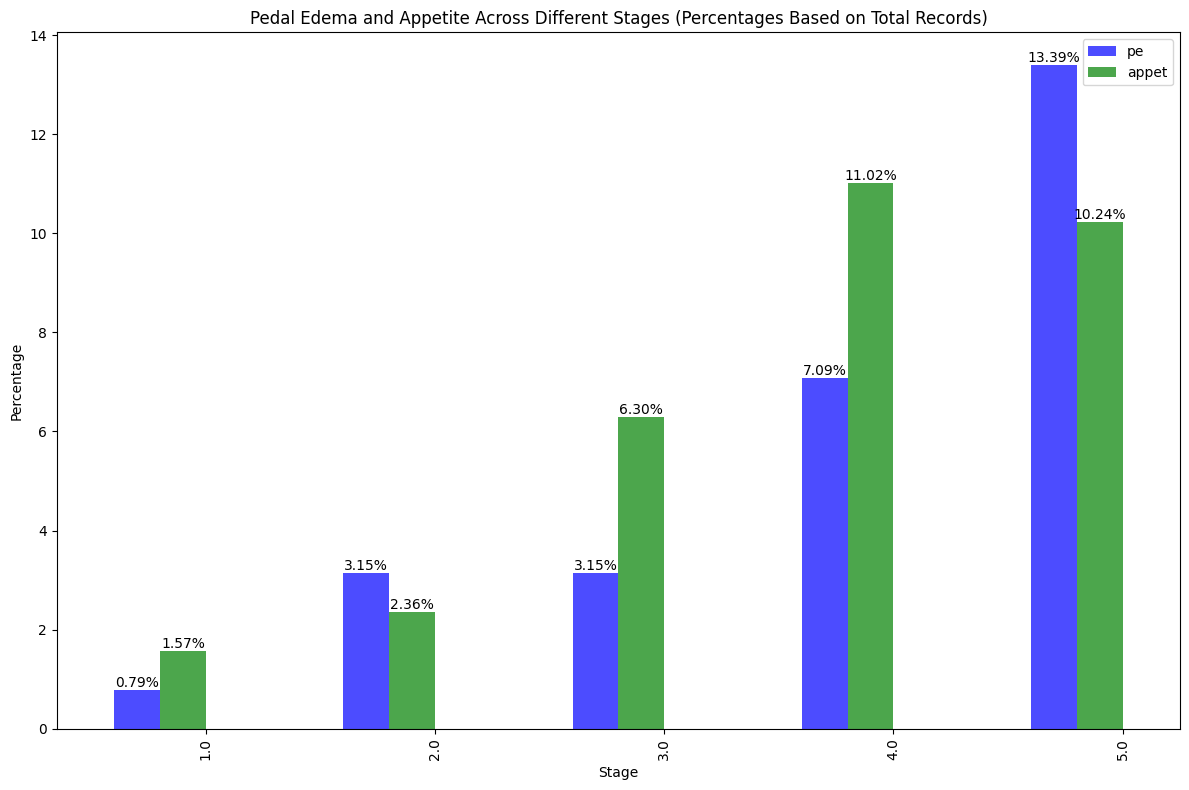

In [44]:
# Extract stage, peda edema and appetite from positive sample & negative sample
physical_symptoms_pos= positive_sample[["stage", "pe", "appet"]]

# Group the data (We know that we have a total 127 record in positive sample)
pe_app_pos= positive_sample.groupby("stage")[["pe", "appet"]].sum()

#
total_pos_records= len(physical_symptoms_pos)
total_pos_records

# Compute in percentage
pe_app_pos_percentage= (pe_app_pos / total_pos_records) * 100

# Plotting the bar chart with percentages
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting positive samples
pe_app_pos_percentage.plot(kind='bar', ax=ax, position=1, width=0.4, color=['blue', 'green'], alpha=0.7, label=['PE Positive', 'Appet Positive'])

# Adding percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge')

plt.title('Pedal Edema and Appetite Across Different Stages (Percentages Based on Total Records)')
plt.xlabel('Stage')
plt.ylabel('Percentage')
plt.legend()
plt.tight_layout()
plt.show()

**Finding of Assumption 6:**

(a) While the data shown that both present of peda edema and appetite issue as the chronic level advanced.

(b) This also explain that individual who has chronic kidney disease may have symptoms of peda edema and appetite issue.

#**Assumption 7: Is grf directly link to the level of chrinic kidney disease?**

In [45]:
# Specify the groups
# Prior runnning independent t-test, let's evaluate based on 3 keys assumption
# (a) Independence: Two groups being compare must be independence.
# (b) Normality: The data in each group should be normally distributed.
# (c) Homogeneity of Variance: The variance of the two groups should be equal, can be tested using Levene's test, else Welch's t-test can be used.
# Independence t-test is not suitable in the case given that the data violated all the assumptions.

group1= positive_sample[positive_sample["stage"] == 1]["grf"]
group2= positive_sample[positive_sample["stage"] == 2]["grf"]
group3= positive_sample[positive_sample["stage"] == 3]["grf"]
group4= positive_sample[positive_sample["stage"] == 4]["grf"]
group5= positive_sample[positive_sample["stage"] == 5]["grf"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

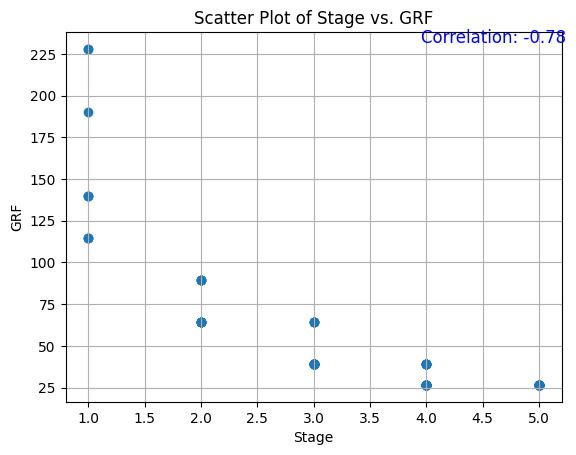

In [46]:
# Test 1: Independence test using correlation
# Compute the correlation
correlation_positive= positive_sample["stage"].corr(positive_sample["grf"])

plt.scatter(positive_sample["stage"], positive_sample["grf"])
plt.title("Scatter Plot of Stage vs. GRF")
plt.xlabel("Stage")
plt.ylabel("GRF")
plt.grid(True)

plt.text(1.01, 1.01, f"Correlation: {correlation_positive:.2f}",
         fontsize= 12,
         color= "blue",
         transform= plt.gca().transAxes,
         ha= "right",
         va= "top")
plt.show()

# Correlation of -0.78 between grf and stage

In [47]:
# Test 2: Normality test
# Testing if the data is normally distributed using Shapiro-Wilk test
from scipy import stats
from scipy.stats import fligner

# Check for normality
print(stats.shapiro(group1))
print(stats.shapiro(group2))
print(stats.shapiro(group3))
print(stats.shapiro(group4))
print(stats.shapiro(group5))

# Perform ANOVA
f_stat, p_val_shapiro= stats.f_oneway(group1, group2, group3, group4, group5)
print('ANOVA test p-value:', p_val_shapiro)

# The result of Shapiro-Wilk test results for normality interpret as below:
# (a) Assuming the null hypothesis assuming all data are normally distributed.
# (b) A p-value of < 0.05, indicates a rejection of null hypothesis, meaning that the data is non-normally distributed.

# Note that since the normality assumption is violated, the result of ANOVA is not relaible.

ShapiroResult(statistic=0.8042095303535461, pvalue=0.022808635607361794)
ShapiroResult(statistic=0.608090877532959, pvalue=0.00012539594899863005)
ShapiroResult(statistic=0.3973531723022461, pvalue=3.4530664438925385e-10)
ShapiroResult(statistic=0.5113070011138916, pvalue=1.6864624974299858e-10)
ShapiroResult(statistic=1.0, pvalue=1.0)
ANOVA test p-value: 5.902478326239809e-52


In [48]:
# Test 2: Normality test
# Given the non-normally distributed data, we used Kruskal-Wallis H test to determine if there are statistically significant differences between groups
h_stat, p_val_kruskal= stats.kruskal(group1, group2, group3, group4, group5)
print('Kruskal-Wallis test p-value:', p_val_kruskal)

# Similar to Shapiro-Wilk test, the interpretataion can be applied here.
# From the result, we rejected the null hpothesis, and conclude there is a significant statistically differences between stage.

Kruskal-Wallis test p-value: 2.044809329926236e-22


In [49]:
# Test 3: Homogeneity of Variance test
# Implementing Flingner-killen test
fligner_stat, fligner_p_val = fligner(group1, group2, group3, group4, group5)
print('Fligner-Killeen test p-value:', fligner_p_val)

# From the result, we successfully reject the null hypothesis, suggesting the variance across groups are not equal.

Fligner-Killeen test p-value: 9.870590868414335e-07


In [50]:
# Implementing Mixed Linear Models
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf_model= smf.mixedlm("grf ~ stage", data= positive_sample, groups= positive_sample["stage"])
smf_result= smf_model.fit()

# Print the summary of the model
print(smf_result.summary())

# Interpretation:
# (a) In early stage/ first stage, grf is on average on 156.297, according to intercept.
# (b) The negative correlation of -30.261, suggest that as stage heading to next stage, the grf will decrease by -30.361 on average.
# (c) The random effect of 816.856, indicates that significant variability in "grf" across different stage, not explained solely by stage.

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: grf      
No. Observations: 127     Method:             REML     
No. Groups:       5       Scale:              183.8233 
Min. group size:  9       Log-Likelihood:     -515.1296
Max. group size:  41      Converged:          Yes      
Mean group size:  25.4                                 
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 156.297   30.276  5.162 0.000  96.957 215.636
stage     -30.261    9.106 -3.323 0.001 -48.108 -12.413
Group Var 816.856   50.597                             



In [51]:
# Example: Including another covariate (e.g., age, gender)
model_with_covariate= smf.mixedlm("grf ~ stage + age", data= positive_sample, groups=positive_sample["stage"])
result_with_covariate= model_with_covariate.fit()
print(result_with_covariate.summary())

# Interpretation:
# (a) Considering both stage and age in the model, it explain as stage progress, the grf will decline on average by 27.887.
# (b) As the age growth by 1 year, the grf decline by 0.314 on average.
# (c) Incorporated age with grf reduce the group variance, suggesting that age does explain some of variability in grf.

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: grf      
No. Observations: 127     Method:             REML     
No. Groups:       5       Scale:              171.2558 
Min. group size:  9       Log-Likelihood:     -511.3502
Max. group size:  41      Converged:          Yes      
Mean group size:  25.4                                 
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 165.116   26.726  6.178 0.000 112.735 217.498
stage     -27.887    8.027 -3.474 0.001 -43.619 -12.156
age        -0.314    0.096 -3.275 0.001  -0.501  -0.126
Group Var 627.468   40.606                             



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

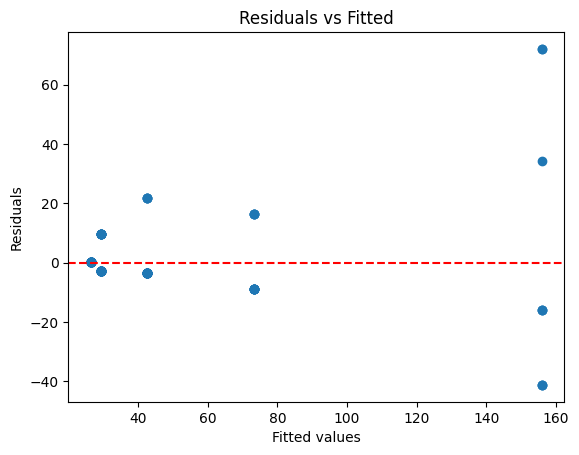

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

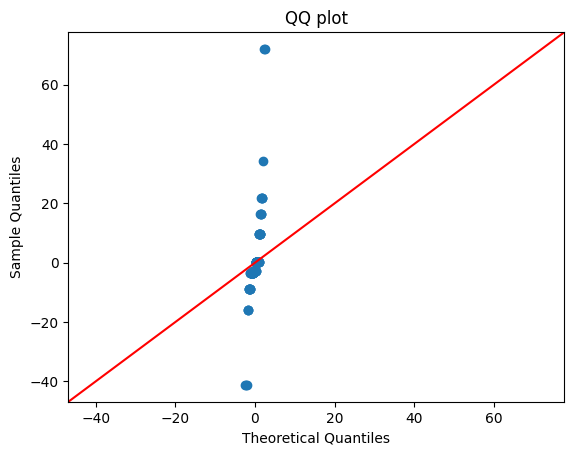

In [52]:
# Residuals plot (temporaray keep it)
residuals = smf_result.resid
fitted = smf_result.fittedvalues

# Residuals vs Fitted plot
plt.scatter(fitted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# QQ plot
sm.qqplot(residuals, line ='45')
plt.title('QQ plot')
plt.show()

**Finding for Assumption 7:**

The interpretation are included test of independence, test of normaluity and homogenity of variance.

(a) The negative correlation of -0.78 between grf and stage suggested that as stage advanced, it will result in a lower grf.

(b) Non-normality data detected.

(c) Variance across group is not equal is detected as well.

(d) In the Mixed Linear Model, we found that in early stage/ first stage, grf is on average on 156.297, according to intercept.

(e) The negative correlation of -30.261, suggest that as stage heading to next stage, the grf will decrease by -30.361 on average.

(f) The random effect of 816.856, indicates that significant variability in "grf" across different stage, not explained solely by stage.


#**Assumption 8: Is chance of getting chronic kidney disease align with the growth of age? Does that mean the higher the age, the higher the chance of developing kidney disease?**

In [53]:
# Extract median age of chronic kidney disease sample
kidney_age_median= positive_sample.groupby("stage").agg({"age": "median"})
kidney_age_median

age
stage       
1.0    16.00
2.0    55.00
3.0    62.50
4.0    62.50
5.0    58.75

**Findings of Assumption 8:**

(a) From the data extracted, chronic kidney disease are very common among the older population, it can also found as youngest as 16 years old.

#**Assumption 9: Is having hypertension and cardiovascular disease likely lead to chronic kidney disease?**

In [54]:
# Extract positive hypertension and positive cardiovascular from positive sample
hypert_cad_ckd= positive_sample[(positive_sample["htn"]== 1) & (positive_sample["cad"]== 1)]

# Compute the record of data
num_record_hypert_cad_ckd= len(hypert_cad_ckd)
num_positive_ckd= len(positive_sample)

# Calculate percentage
percentage_hypert_cad_ckd= (num_record_hypert_cad_ckd / num_positive_ckd) * 100
percentage_hypert_cad_ckd

14.960629921259844

In [55]:
# Further evaluate data based on the age, albumin level, hemoglobin and pcv based on the stage
hypert_cad_ckd_stat= hypert_cad_ckd.groupby("stage")[["al",
                                                      "su",
                                                      "bu",
                                                      "sc",
                                                      "grf",
                                                      "age"]].median()
hypert_cad_ckd_stat

al      su        bu     sc       grf    age
stage                                               
3.0    1.0  0.7495   57.6245  3.649  39.20035  62.50
4.0    2.0  0.7495   86.2000  3.649  26.61650  66.25
5.0    3.0 -0.0010  105.2500  5.225  26.61650  62.50

**Findings on Assumption 9:**

(a) From the computation, 15% of population who is dignosed with chronic kidney disease found to have  hypertension (htn) and cardiovascular disease (cad).

(b) Through the observation, albumin, blood urea, and serum creatinine has a positive relationship to the stage of chronic kidney disease; while sugar level and glomerular filteration rate has has a negative relaionship to the stage of chronic kidney disease.  




#**Challenge The Assumptions:**

#**Findings for Assumption 1:**
In average, blood urea (bu) and glomerular filteration rate (grf) differ significantly across different stages. In median, albumin (al) and glomerular filteration rate (grf) differ significantly across different stages.

#**Findings for Assumption 2:**

While a significant differences observed on the average sugar level between chronic kidney disease patient and non- chronic kidney disease, that does not mean present of high sugar level indicate the present of chronic kidney disease.

#**Findings for Assumption 3:**

Blood-examined test is more efficient in identifying chronic kidney disease than urine test, according to albumin (al), blood glucose random (bgr) and blood urea (bu) from ROC curve. Spearman correlation further support glomerular filteration rate (grf) and albumin (al) for the findings.

#**Finding for Assumption 4:**
From the observation within the sample, we observed people who suffer a chronic kidney disease has a positive record of diabetes mellitus.

#**Findings for Assumption 5:**

Presnet of positive record of average Pus cell (pc) and average bacteria (ba) can be used as a detector of chronic kidney disease.

#**Findings for Assumption 6:**

Preset of chronic kidney disease may lead to peda edema (pe) and appetite (appet)- physical symptoms. As the stage advanced, the more likelihood these symptoms would present.


#**Findings for Assumpttion 7:**

Spearman correlation present a negative correlation of -0.78 between grf and stage. The Mixed Linear Model suggest that as stage advanced, the grf will decline by -30.361 on average.

#**Findings for Assumption 8:**

Chronic kidney disease are very common among the older population, however, it can also found as youngest as 16 years old.

#**Findings for Assumption 9:**

From the computation, 15% of population who is dignosed with chronic kidney disease found to have  hypertension (htn) and cardiovascular disease (cad).


#**Examine Key Features From Both Positive and Negative Sample**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

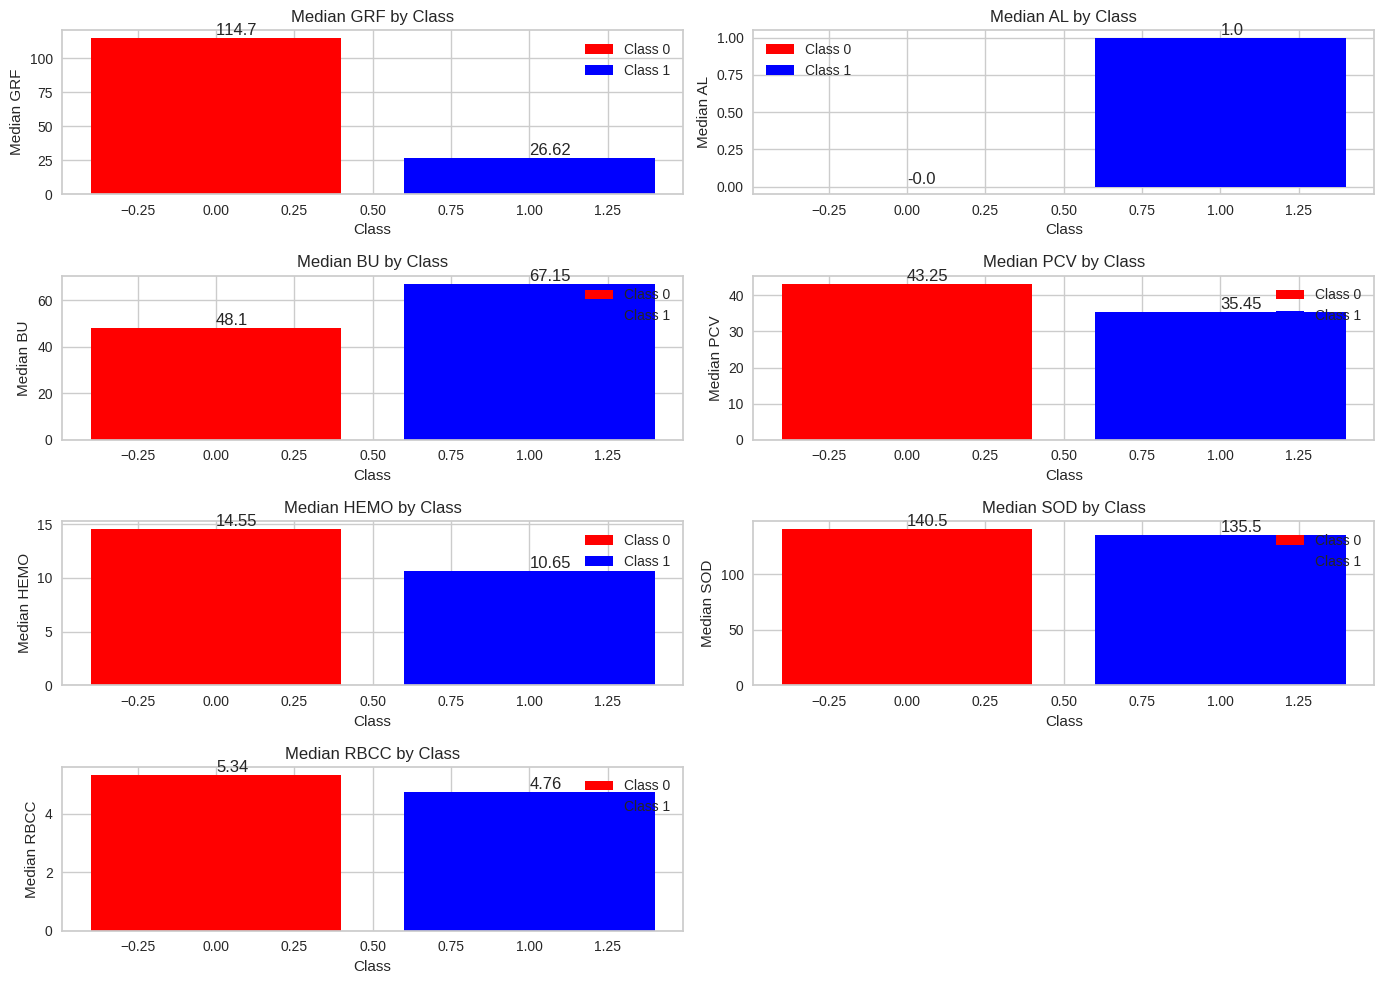

In [74]:
# GRF, AL, BU, PCV
# Selecting key features and the class column
key_features = df2[["grf", "al", "bu", "pcv", "hemo", "rbcc", "sod", "class"]]

# Grouping by 'class' and computing the mean
key_features_by_class = key_features.groupby("class").median().reset_index()

# Plotting the mean values for each feature grouped by class
plt.figure(figsize=(14, 10))

# Create a bar chart for each feature
features = ["grf", "al", "bu", "pcv", "hemo", "sod", "rbcc"]
colors = {0: "red", 1: "blue"}

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    class_0 = key_features_by_class[key_features_by_class["class"] == 0]
    class_1 = key_features_by_class[key_features_by_class["class"] == 1]

    bar0 = plt.bar(class_0["class"], class_0[feature], color= colors[0], label= "Class 0")
    bar1 = plt.bar(class_1["class"], class_1[feature], color= colors[1], label= "Class 1")

    plt.title(f'Median {feature.upper()} by Class')
    plt.xlabel("Class")
    plt.ylabel(f'Median {feature.upper()}')
    plt.legend()

    # Adding data labels
    for bar in bar0:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va= "bottom")

    for bar in bar1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va= "bottom")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [75]:
# Fact check the data
key_features_by_class

class       grf     al      bu    pcv   hemo   rbcc    sod
0    0.0  114.6980 -0.001  48.099  43.25  14.55  5.345  140.5
1    1.0   26.6165  1.000  67.150  35.45  10.65  4.755  135.5

#**Train-Test-Split**

In [58]:
# Standardisation split
data_for_standardisation= df2.copy()
data_for_standardisation

y_standardisation= data_for_standardisation[["class"]]
x_standardisation= data_for_standardisation.drop("class", axis= 1)

x_train_ss, x_test_ss, y_train_ss, y_test_ss= train_test_split(x_standardisation, y_standardisation, test_size= 0.2, random_state= 42)

print("Standardisation Training set:", x_train_ss.shape, y_train_ss.shape)
print("Standardisation Testing set:", x_test_ss.shape, y_test_ss.shape)

<IPython.core.display.Javascript object>

Standardisation Training set: (159, 28) (159, 1)
Standardisation Testing set: (40, 28) (40, 1)


In [59]:
# Normalisation split
data_for_normalisation= df2.copy()
data_for_normalisation

y_normalisation= data_for_normalisation[["class"]]
x_normalisation= data_for_normalisation.drop("class", axis= 1)

x_train_nn, x_test_nn, y_train_nn, y_test_nn= train_test_split(x_normalisation, y_normalisation, test_size= 0.2, random_state= 42)

print("Normalisation Training set:", x_train_nn.shape, y_train_nn.shape)
print("Normalisation Testing set:", x_test_nn.shape, y_test_nn.shape)


<IPython.core.display.Javascript object>

Normalisation Training set: (159, 28) (159, 1)
Normalisation Testing set: (40, 28) (40, 1)


#**Scale the Data**

Important Considerations
Fitting vs. Transforming: When applying StandardScaler, it’s crucial to fit the scaler only on the training data and then transform both the training data and the test data. This avoids data leakage during model training.


Data Leakage: Ensure that any form of fit operation is done on the training set alone, not on the entire dataset, to prevent the model from having information about the test set.


Pipeline Integration: In practice, incorporate scaling as a step in a preprocessing pipeline if you are also applying other transformations (like PCA, encoding categorical variables, etc.) or building machine learning models.

Note that standardisation is useful for algorithms such as:
- SVM
- Linear Regression
- Logistics Regression
- PCA
- KMeans
- Ridge and Lasso Regression

Normalisation is useful for algorithms such as:
- Neural Network
- Distance-Based Algorithm: KNN/ DBSCAN
- Gradient Boosting Models

**Implement Standardisation**

In [60]:
# Standardise the data
# Fit_transform on train set
# Transform the test set
ss= StandardScaler()
x_train_ss= ss.fit_transform(x_train_ss)
x_test_ss= ss.transform(x_test_ss)

# Make a copy for differnet purpose
kernelpca_xtrain= x_train_ss.copy()
fa_xtrain= x_train_ss.copy()

<IPython.core.display.Javascript object>

**Implement Normalisation**

In [61]:
# Normalise data using Min-Max Scaler
mm= MinMaxScaler()
x_train_mm= mm.fit_transform(x_train_nn)
x_test_mm= mm.transform(x_test_nn)

# Make a copy for different purpose
dbscan_xtrain= x_train_mm.copy()
kmean_xtrain= x_train_mm.copy()

<IPython.core.display.Javascript object>

#**Implement Spearman Correlation**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

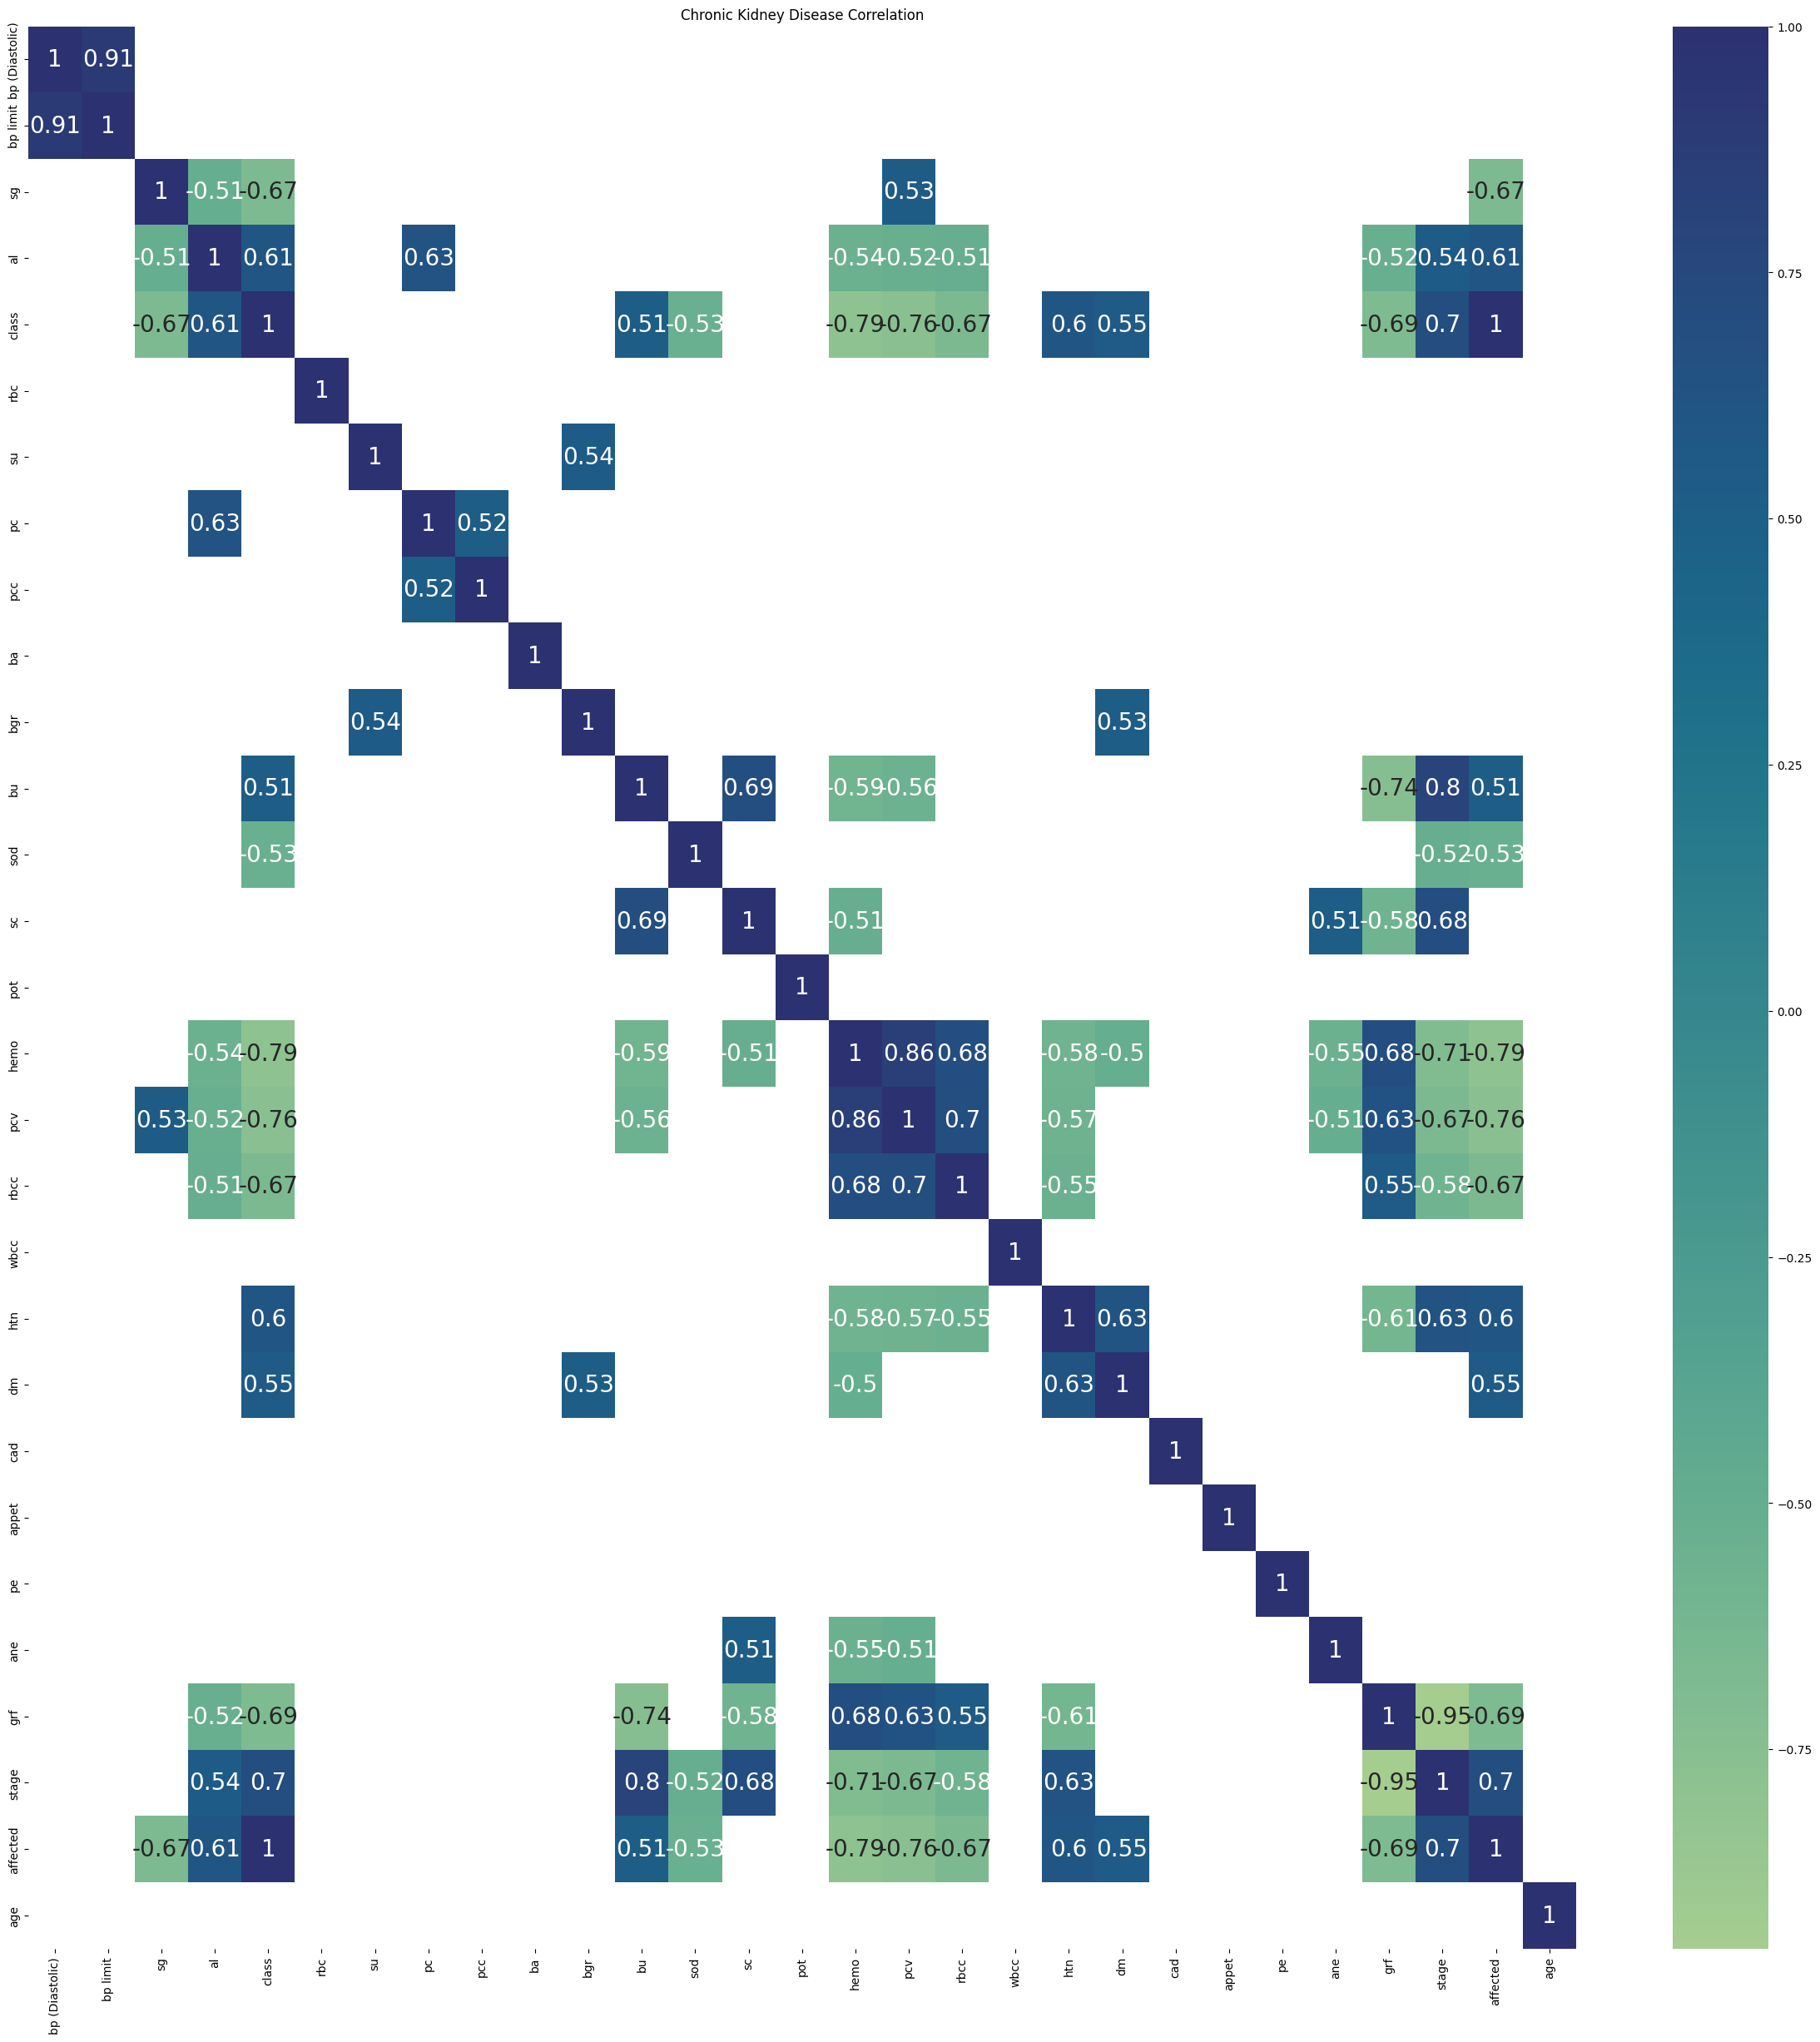

In [62]:
# Creating spearman correlation
spearman= df2.corr(method= "spearman")

# Mask values where the absolute correlation is less than 0.5
spearman_masked= spearman.where(np.abs(spearman) > 0.5)
plt.figure(figsize=(30, 30))
spearman_heatmap= sns.heatmap(spearman_masked, annot=True, cmap="crest", annot_kws={"size": 20})

# Show the plot
plt.title("Chronic Kidney Disease Correlation")
plt.show()

#**Implement Predictive Power Score**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

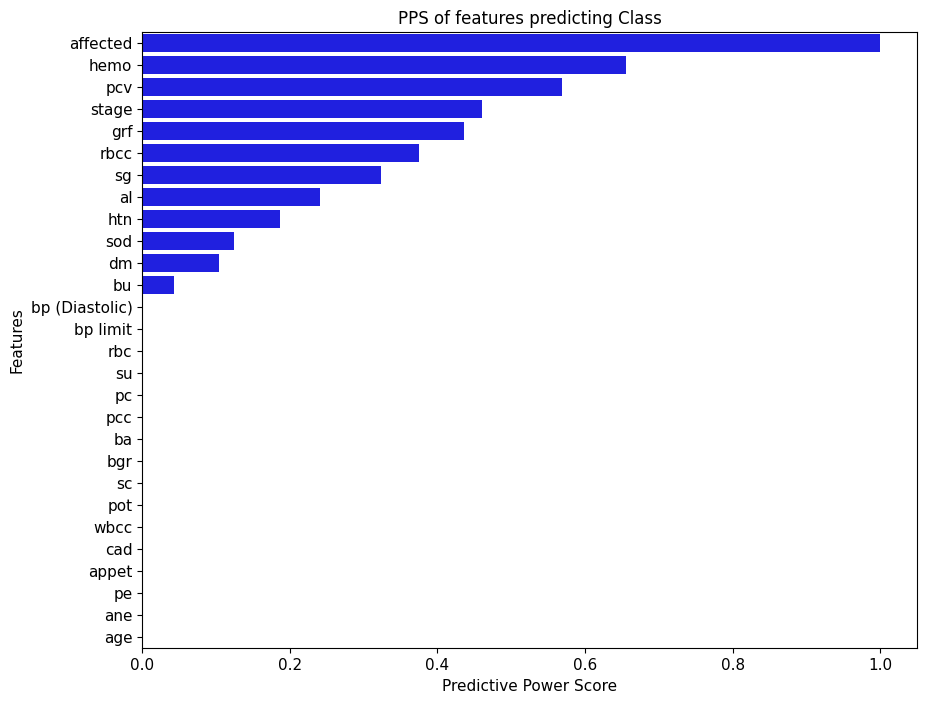

In [63]:
# Applying PPS using the original dataset
pps_results= pps.predictors(df2, y= "class")

# Set the size
plt.rcParams.update({"font.size": 10})

# Create the plot
plt.figure(figsize= (10, 8))
barplot= sns.barplot(data= pps_results, x= "ppscore", y= "x", color= "blue")

# Adjust the title and label sizes
plt.title("PPS of features predicting Class", fontsize= 12)
plt.xlabel("Predictive Power Score", fontsize= 11)
plt.ylabel("Features", fontsize= 11)

# Set the label size
barplot.tick_params(axis= "x", labelsize= 11)
barplot.tick_params(axis= "y", labelsize= 11)
plt.show()

#**Implement Feature Importance**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

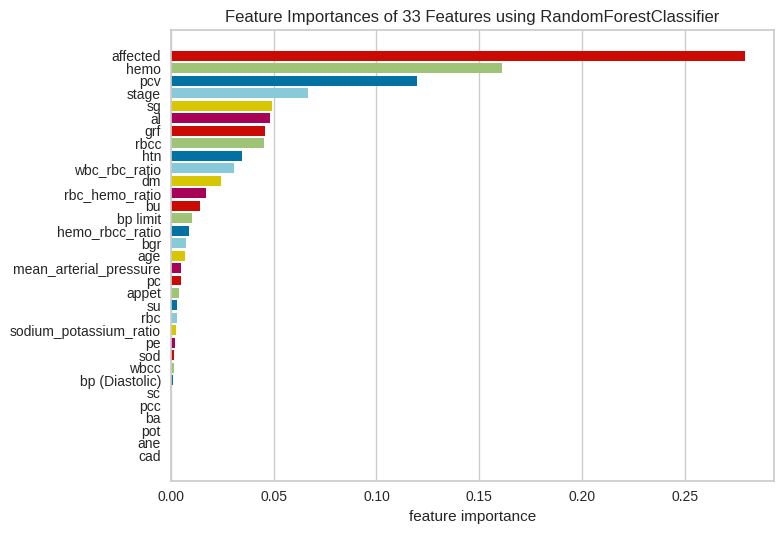

<Axes: title={'center': 'Feature Importances of 33 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [64]:
# Applying Feature Importance using YellowBrick
# Given the randomness of the algorithm, cross-validation & stability selection is applied to select consistent features
from yellowbrick.model_selection import FeatureImportances

y_df4= df4[["class"]]
x_df4= df4.drop("class", axis= 1)

# Initialise cross validatiion
skf= StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

# Implementing feature importance
featureimportance_model= RandomForestClassifier(n_estimators= 100, random_state= 42)
feature_importances= []

# Implement cv
for train_index, test_index in skf.split(x_df4, y_df4):
    df4x_train, df4x_test= x_df4.iloc[train_index], x_df4.iloc[test_index]
    df4y_train, df4y_test= y_df4.iloc[train_index], y_df4.iloc[test_index]
    featureimportance_model.fit(df4x_train, df4y_train)
    feature_importances.append(featureimportance_model.feature_importances_)

# With the data is not normally distributed, we used median instead of averaging features importance across folds
median_importances= np.median(feature_importances, axis=0)

# Visualizing the median feature importances
viz = FeatureImportances(featureimportance_model, relative=False)
viz.fit(x_df4, y_df4)
viz.feature_importances_= median_importances
viz.show()


#**Exploring Clustering to Understad the Data**

#**Exploring Spectral Clustering & Kernel PCA**

In [65]:
# Make a copy of original dataset
# Applying clustering using the whole dataset
# KMeans, spectral clustering and DBSCAN use normalised data
# KernelPCA and hierarchical clustering use standardised data
df5= df2.copy()
df5_features= df5.drop("class", axis= 1)
df6_features= df5_features.copy()

# Standardised data for kernelPCA
standardised_df5= ss.fit_transform(df5_features)

# Normalise data for KMeans, Spectral clustering, DBSCAN
normalised_df6= mm.fit_transform(df6_features)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

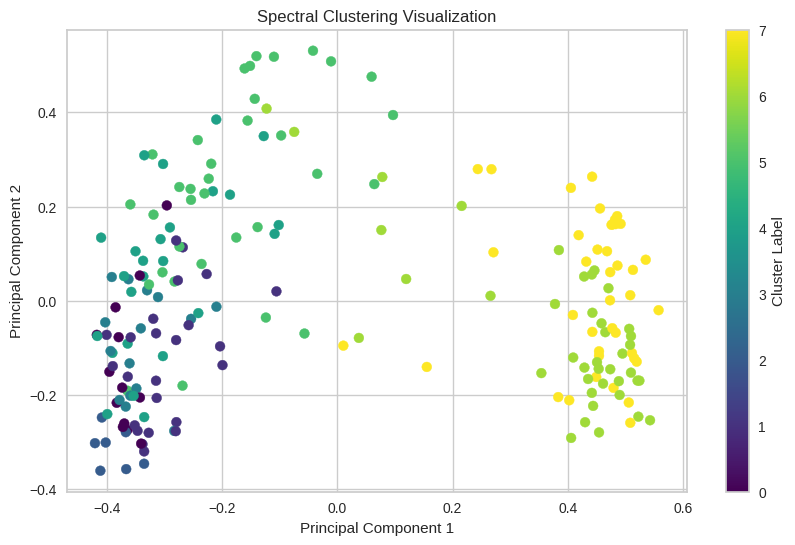

In [66]:
# Applying Spectral Clustering using normalised data
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import KernelPCA

sc= SpectralClustering(assign_labels= "cluster_qr", affinity= "rbf", eigen_tol= "auto")
sc_clusters= sc.fit_predict(normalised_df6)

# Create a column for spectral clustering result
df7= df2.copy()
df7["sc_clusters"]= sc_clusters

# Reshape the 1d data into 2d, then standardised the data for kernelpca
sc_clusters_reshaped= np.reshape(sc_clusters, (-1, 1))

# Construct KernelPCA
kpca = KernelPCA(kernel="rbf", eigen_solver="auto")
reduced_data= kpca.fit_transform(standardised_df5)

# Plotting the results
plt.figure(figsize= (10, 6))

# Scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c= sc_clusters, cmap= "viridis", s= 50)

# Adding labels and title
plt.title("Spectral Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding a color bar
plt.colorbar(label= "Cluster Label")
plt.show()

#**Findings for Spectral Clustering & KernelPCA Clustering:**

(a) From the plot above, we can clearly see that the data itself comprise a total of 7 clusters.

#**Exloring KMeans**:

Algorithm: lloyd, Metric: distortion


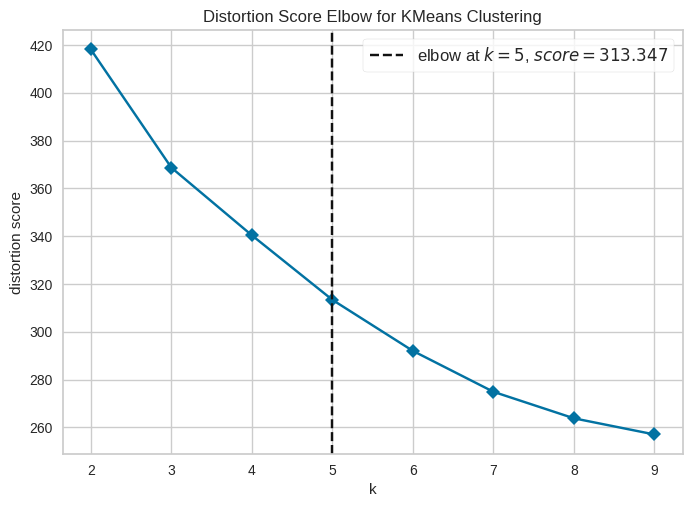

Algorithm: lloyd, Metric: silhouette


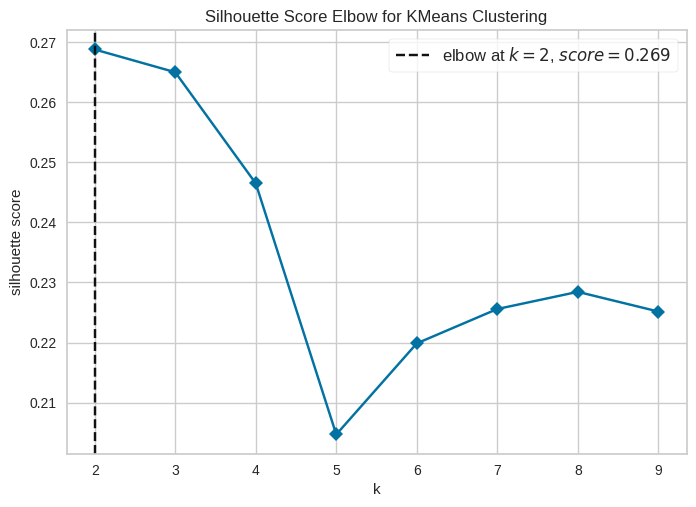

Algorithm: lloyd, Metric: calinski_harabasz


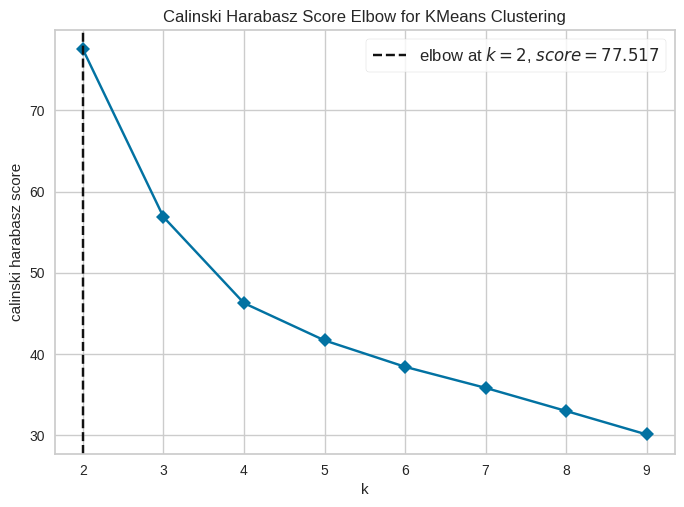

Algorithm: elkan, Metric: distortion


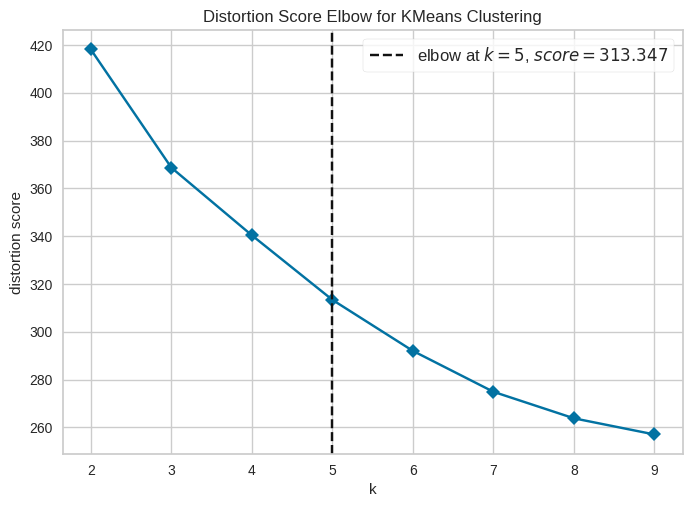

Algorithm: elkan, Metric: silhouette


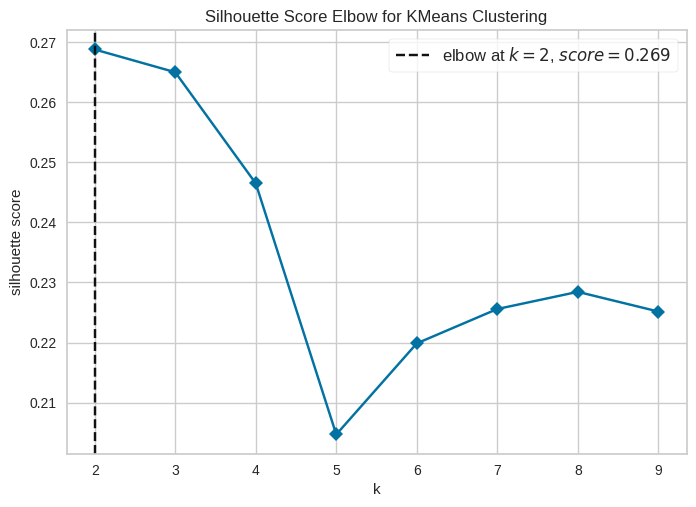

Algorithm: elkan, Metric: calinski_harabasz


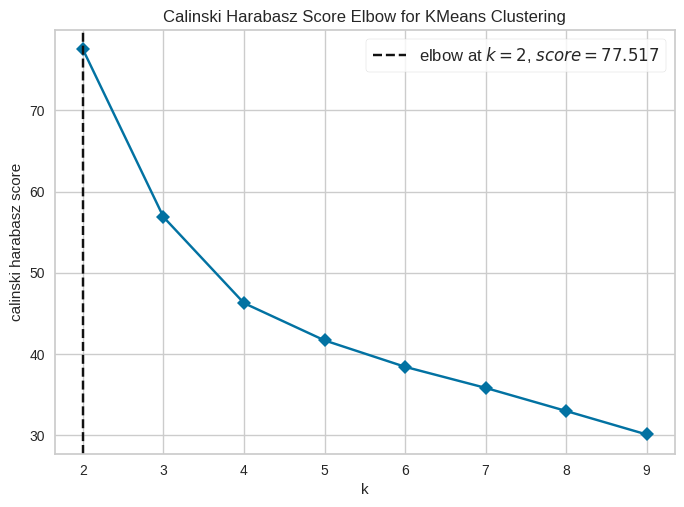

In [67]:
# KMeans and DBSCAN use normalised data
# KMeans, test with different clusters and algorithms parameters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Listed the parameters
init_method= ["k-means++"]
km_algorithms= ["lloyd", "elkan"]
km_metrics= ["distortion", "silhouette", "calinski_harabasz"]

# Applying Kmeans via KelbowVisualizer
for kmeans_algorithm in km_algorithms:
  for kmeans_metric in km_metrics:
    yellow_kmeans= KMeans(init= init_method[0], algorithm= kmeans_algorithm, random_state= 42)
    yellow_visualiser= KElbowVisualizer(yellow_kmeans, k= (2, 10), timings= False, metric= kmeans_metric)
    yellow_kmeans= yellow_visualiser.fit(normalised_df6)

    # Use the fitted KMeans model to get cluster labels
    fitted_kmeans= yellow_kmeans.estimator
    kmcluster_labels = fitted_kmeans.labels_

    # Add cluster labels to df7
    df7[f'km_{kmeans_algorithm}_{kmeans_metric}_clusters']= yellow_kmeans.labels_

    print(f"Algorithm: {kmeans_algorithm}, Metric: {kmeans_metric}")
    yellow_kmeans.show()

#**Findings for KMeans:**

Explaination of metrices

(a) calinski_harabasz- Measure the ratios of the between cluster dispersion and the within cluster dispersion. It aim to idnetify clusters that are compact (small within cluster dispersion) and well-separated (large between cluster dispersion).  higher CH score indicates that the cluster is dense and well-separated.

(b) silhoutte- Measure how well each data points fit into its assigned cluster compared to others. A value close to 1 indicate the data points is well-matchedto its own, and poorly matched to other clusters.

(c) With both the metrics max at 57 and 0.26 respectively for calinski_harabasz and silhoutte score, it is suggested that the dataset has 2 clusters. One is compact for majority data and one for outlier.

# **Inspect The Dataset**

In [68]:
# Inspect the dataset
df7.head(5)

bp (Diastolic)  bp limit     sg     al  class  rbc     su   pc  pcc   ba  \
2             0.0       0.0  1.020  1.000    1.0  0.0 -0.001  0.0  0.0  0.0   
3             0.0       0.0  1.010 -0.001    1.0  0.0 -0.001  0.0  0.0  0.0   
4             0.0       0.0  1.010  4.001    1.0  1.0 -0.001  1.0  0.0  1.0   
5             1.0       1.0  1.010  3.000    1.0  0.0 -0.001  0.0  0.0  0.0   
6             0.0       0.0  1.016 -0.001    1.0  0.0 -0.001  0.0  0.0  0.0   

   ...  stage  affected     age  sc_clusters  km_lloyd_distortion_clusters  \
2  ...    1.0       1.0  11.999            7                             6   
3  ...    1.0       1.0  11.999            7                             6   
4  ...    1.0       1.0  11.999            1                             0   
5  ...    1.0       1.0  11.999            6                             0   
6  ...    1.0       1.0  16.000            5                             6   

   km_lloyd_silhouette_clusters  km_lloyd_calinski_harabasz_clusters  \
2                             6                                    6   
3                             6                                    6   
4                             0                                    0   
5                             0                                    0   
6                             6                                    6   

   km_elkan_distortion_clusters  km_elkan_silhouette_clusters  \
2                             6                             6   
3                             6                             6   
4                             0                             0   
5                             0                             0   
6                             6                             6   

   km_elkan_calinski_harabasz_clusters  
2                                    6  
3                                    6  
4                                    0  
5                                    0  
6                                    6  

[5 rows x 36 columns]

#**Shape The Narrative- Telling the Story Utilise Minto Pyramid**

#**Key Message: The Answer**

The analysis above has finalised 5 bio data that can help us identify early sign of CKD, they are:

- Glomerular Filtration Rate (grf),

- Pack Cell Volume (pcv)

- Albumin (al)

- Hemogloblin (hemo)

- Red Blood Cell Count (rbcc)

- Blood Urea (bu)





#**Supporting Arguments**

**Supporting Argument 1:** Key health metrics are strongly correlated to the presence of CKD.


**Supporting Argument 2:** Early detection of CKD is possible given the significant changes in bio-reading in different stages.



**Supporting Argument 3:** Blood tests are likely a more effective option for evaluating an individual's risk of CKD.








**Supporting Argument 4:** Abnormal results from blood urea and albumin can be used to diagnose non-CKD among patients.

#**Supporting Data / Facts**

**Supporting Data 1:** Glomerular filtration rate (grf) tell about the efficiency of kidneys in filtering blood and waste in the body. An individual with a grf lower than 90 (mL/min) inidcates potential kidney disease.

Patient with CKD is found to have a median grf of 26.62 (mL/min), significantly lower as compared to 90 (mL/min).


---



**Supporting Data 2:** Packed Cell Volume (pcv) measure the proportion of red blood cells in a blood sample. A fall in packed cell volume (pcv) is associated with anemia. A pcv below the range of 35.5% to 48.6% indicates potential kidney disease among patients.

CKD patients on the median have been found to have a pcv level of 35.45% significantly lower than 43.25% for non-CKD patients.



---



**Supporting Data 3:** Albumin (al) is a protein that is usually found in blood, transporting hormones, and vitamins throughout the body for tissue growth and repair. An albumin lower than 3.5 to 5 (g/dL) could indicate severe health issues. Invidual diagnosed

Individuals who suffer CKD have been found to have albumin levels of 1 (g/dL). On the other hand, individuals diagnosed with non-CKD have been found to have an albumin level of 0 (g/dL).

---



**Supporting Data 4:** Hemogloblin (hemo) is a protein, that carries oxygen throughout the whole body. A healthy hemoglobin level among adults is any point higher than 12. A lower than 12 hemoglobin bio reading points to chronic inflammation within the body, often found in patients with CKD.

Patients with non-CKD have been found to have a hemoglobin level of 14.55 (g/dL) on the median, which falls within the healthy range. On the other hand, a patient with CKD has a hemoglobin level of 10.65 (g/dL), lower than the acceptable threshold.

---



**Supporting Data 5:** A healthy red blood cell count level is between 4.1 to 6.1 million/mcL (including children). A low level of pcv and hemoglobin is attributed to the reduced red blood cell count within the body.

The rbcc level for both patients with CKD and non-CKD remains within the acceptable range, with the CKD patient's rbcc level lower than non-CKD patient.

---



**Supporting Data 6:** An ideal blood urea level is between 6 to 24 (mg/dL). A blood urea reading higher than the optimal range suggests kidney dysfunction.

Patients with non-CKD were found to have a 2x higher ceiling threshold at 48.1 (mg/dL), whereas patients with CKD have a bu level of 2.8x higher than the max threshold level.

---



#**Next Stage**

This project is yet completed. With the data analysed and interpreted above, the basic knowledge and differences of the key data for both chronic kidney disease (CKD) and non chronic kidney disease (Non-CKD) has been identified to understand the early sign of CKD.



With the knowledge built, the next stage of the project is to explore the relationship of different clusters to the present of chronic kidney disease among patients.

Further extend to bayesian inferences and machine learning models.

